In [1]:
# Data and plots management
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Chemoinformatic
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
PandasTools.RenderImagesInAllDataFrames(images=True) # Visualize molecules

In [2]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [4]:
df=pd.read_excel('top5_np_classifier_class.xlsx', sheet_name='top5_np_classifier_class')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   identifier                        139 non-null    object 
 1   canonical_smiles                  139 non-null    object 
 2   standard_inchi                    139 non-null    object 
 3   standard_inchi_key                139 non-null    object 
 4   name                              101 non-null    object 
 5   iupac_name                        139 non-null    object 
 6   annotation_level                  139 non-null    int64  
 7   total_atom_count                  139 non-null    int64  
 8   heavy_atom_count                  139 non-null    int64  
 9   molecular_weight                  139 non-null    float64
 10  exact_molecular_weight            139 non-null    float64
 11  molecular_formula                 139 non-null    object 
 12  alogp   

identifier                                   canonical_smiles  \
0  CNP0295445.1  C=C(CO)C(=O)O[C@H]1CC(=C)[C@@H]2C[C@H](O)C(=C)...   
1  CNP0133041.0  COC1=CC=C(C2=CC(=O)C3=C(OC)C(OC)=C(OC)C=C3O2)C=C1   

                                      standard_inchi  \
0  InChI=1S/C19H22O6/c1-8-5-14(24-18(22)9(2)7-20)...   
1  InChI=1S/C19H18O6/c1-21-12-7-5-11(6-8-12)14-9-...   

            standard_inchi_key                            name  \
0  KHSCYOFDKADJDJ-NQLMQOPMSA-N                    Cynaropicrin   
1  URSUMOWUGDXZHU-UHFFFAOYSA-N  Scutellarein tetramethyl ether   

                                          iupac_name  annotation_level  \
0  [(3~{a}~{R},4~{S},6~{a}~{R},8~{S},9~{a}~{R},9~...                 5   
1  5,6,7-trimethoxy-2-(4-methoxyphenyl)chromen-4-one                 5   

   total_atom_count  heavy_atom_count  molecular_weight  ...  \
0                47                25            346.38  ...   
1                43                25            342.35  ...   

             np_classifier_pathway np_classifier_superclass  \
0                       Terpenoids         Sesquiterpenoids   
1  Shikimates and Phenylpropanoids               Flavonoids   

        np_classifier_class  np_classifier_is_glycoside  \
0  Guaiane sesquiterpenoids                       False   
1                  Flavones                       False   

                                           organisms  \
0  Achillea biebersteinii|Achillea fragrantissima...   
1  Ageratina altissima|Angelica ursina|Ardisia ma...   

                                         collections  \
0  ANPDB|AnalytiCon Discovery NPs|Australian natu...   
1  ANPDB|AnalytiCon Discovery NPs|CMAUP (cCollect...   

                                                dois  \
0  10.1002/9780470744307.gat218|10.1002/CHIN.1986...   
1  10.1002/JSSC.201300794|10.1007/BF00636017|10.1...   

                                            synonyms         cas  \
0  Cynaropicrin|35730-78-0|Cynaropikrin|2-Propeno...  35730-78-0   
1  1168-42-9|4'|5|6|7-Tetramethoxyflavone|Tetrame...   1168-42-9   

                                               ROMol  
0  <rdkit.Chem.rdchem.Mol object at 0x0000020D7AE...  
1  <rdkit.Chem.rdchem.Mol object at 0x0000020D7AE...  

[2 rows x 45 columns]
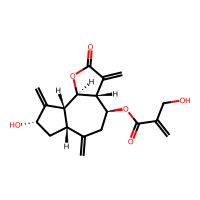
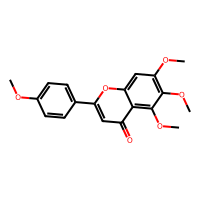

In [6]:
#New object column Mol type
PandasTools.AddMoleculeColumnToFrame(df, "canonical_smiles")
df[0:2]

In [7]:
#Calculate the rest of the descriptors
df["MW"] = df["ROMol"].apply(Descriptors.ExactMolWt)
df["HBA"] = df["ROMol"].apply(Descriptors.NumHAcceptors)
df["HBD"] = df["ROMol"].apply(Descriptors.NumHDonors)
df["logP"] = df["ROMol"].apply(Descriptors.MolLogP)
df["TPSA"] = df["ROMol"].apply(Descriptors.TPSA)
df["CSP3"] = df["ROMol"].apply(Descriptors.FractionCSP3)
df["NumRings"] = df["ROMol"].apply(Descriptors.RingCount)
df["HetAtoms"] = df["ROMol"].apply(Descriptors.NumHeteroatoms)
df["RotBonds"] = df["ROMol"].apply(Descriptors.NumRotatableBonds)

In [8]:
df[['MW', 'HBA', 'HBD', 'logP']]

MW  HBA  HBD     logP
0    346.141638    6    2  1.05760
1    342.110338    6    0  3.49440
2    416.125988    6    2  4.38150
3    240.078644    3    0  3.26322
4    274.120509    4    0  3.31890
..          ...  ...  ...      ...
134  408.193674    5    3  5.52960
135  230.130680    2    0  3.99962
136  264.136159    4    2  1.18220
137  398.113231    7    2  0.85260
138  296.125988    6    3 -0.49170

[139 rows x 4 columns]

In [13]:
df.columns.to_list()

['identifier',
 'canonical_smiles',
 'standard_inchi',
 'standard_inchi_key',
 'name',
 'iupac_name',
 'annotation_level',
 'total_atom_count',
 'heavy_atom_count',
 'molecular_weight',
 'exact_molecular_weight',
 'molecular_formula',
 'alogp',
 'topological_polar_surface_area',
 'rotatable_bond_count',
 'hydrogen_bond_acceptors',
 'hydrogen_bond_donors',
 'hydrogen_bond_acceptors_lipinski',
 'hydrogen_bond_donors_lipinski',
 'lipinski_rule_of_five_violations',
 'aromatic_rings_count',
 'qed_drug_likeliness',
 'formal_charge',
 'fractioncsp3',
 'number_of_minimal_rings',
 'van_der_walls_volume',
 'contains_sugar',
 'contains_ring_sugars',
 'contains_linear_sugars',
 'murcko_framework',
 'np_likeness',
 'chemical_class',
 'chemical_sub_class',
 'chemical_super_class',
 'direct_parent_classification',
 'np_classifier_pathway',
 'np_classifier_superclass',
 'np_classifier_class',
 'np_classifier_is_glycoside',
 'organisms',
 'collections',
 'dois',
 'synonyms',
 'cas',
 'ROMol',
 'MW',
 '

## Análisis exploratorio de las propiedades fisicoquímicas relacionadas con la absorción oral

In [12]:
#Selección de propiedades_ creación de un nuevo dataframe
df_oral= df[['MW','HBA','HBD','logP','TPSA','CSP3','NumRings','HetAtoms','RotBonds']]

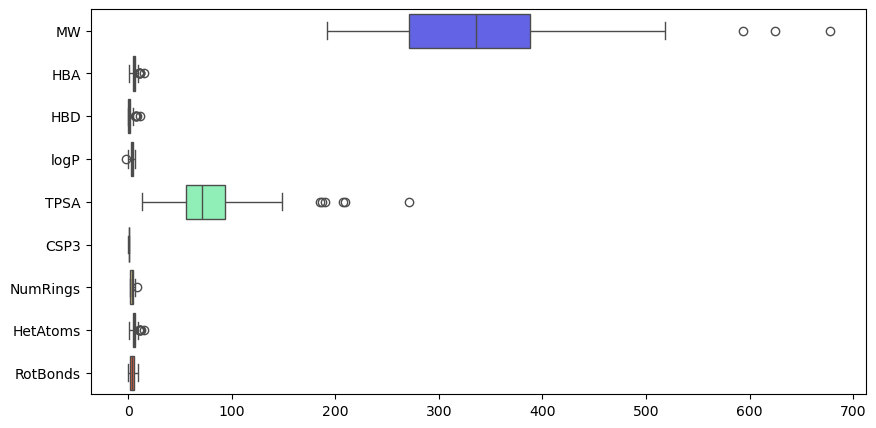

In [13]:
#Plot boxplots for all the variables
ax = sns.boxplot(data=df_oral, orient="h", palette="rainbow")
#Specify the size of the figure with Matplotlib
plt.gcf().set_size_inches(10, 5)
plt.show()

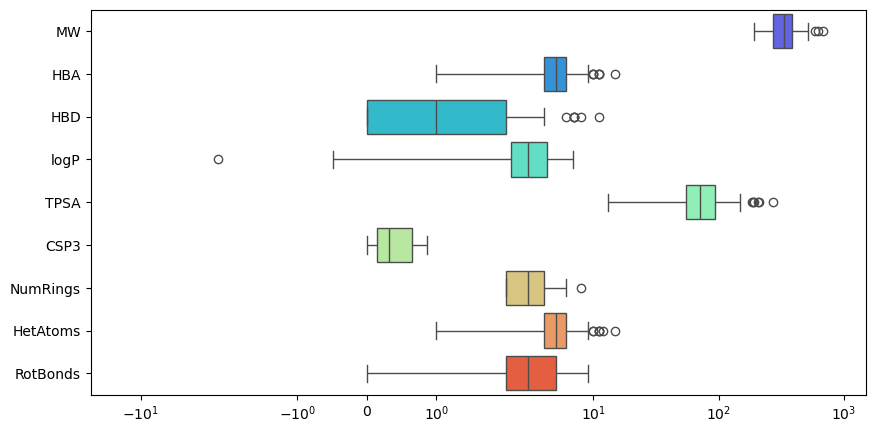

In [14]:
#Plot boxplots for all the variables
ax = sns.boxplot(data=df_oral, orient="h", palette="rainbow")
# X axis in logarithmic scale
ax.set_xscale('symlog')
#Specify limits for X axis
ax.axis(xmin=-25, xmax=1500)
#Size of the figure
plt.gcf().set_size_inches(10, 5)


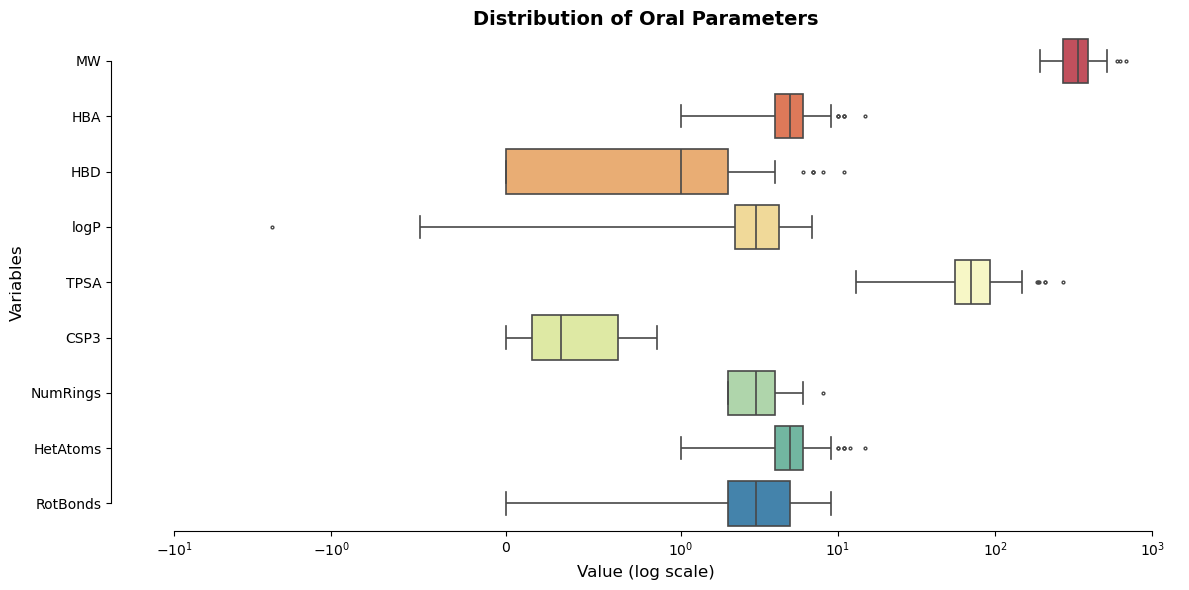

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Improved Boxplot for All Variables ---
plt.figure(figsize=(12, 6))  # Larger and clearer figure

ax = sns.boxplot(
    data=df_oral,
    orient="h",
    palette="Spectral",      # Cleaner aesthetic than "rainbow"
    linewidth=1.2,           # Sharper lines
    fliersize=2              # Smaller outlier markers
)

# Logarithmic scale for X-axis (symmetric log)
ax.set_xscale("symlog", linthresh=1)

# Axis limits
ax.set_xlim(-25, 1500)

# Titles and labels
ax.set_title("Distribution of Oral Parameters", fontsize=14, fontweight="bold")
ax.set_xlabel("Value (log scale)", fontsize=12)
ax.set_ylabel("Variables", fontsize=12)

sns.despine(trim=True)  # Cleaner frame

plt.tight_layout()
plt.show()


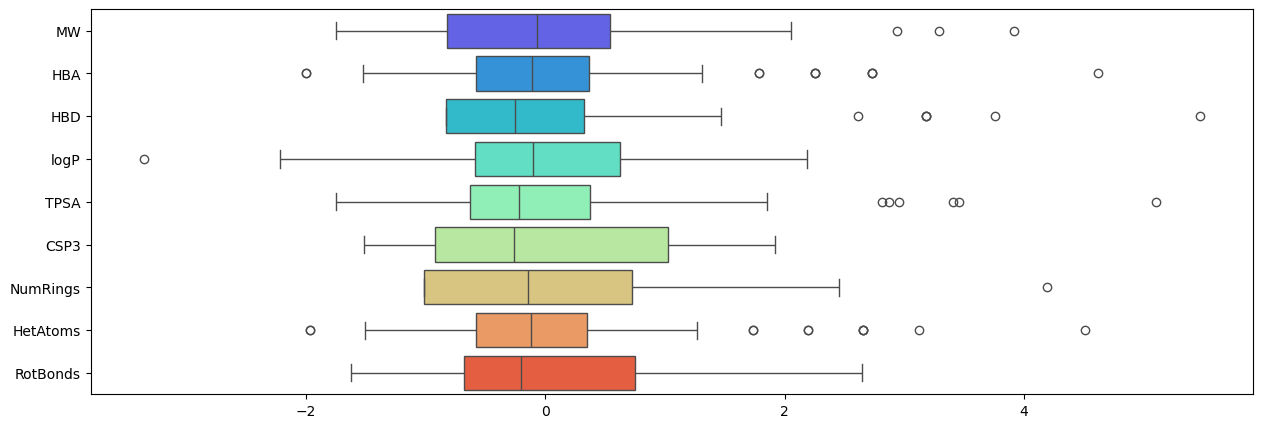

In [16]:
#Import the StandardScaler function from ScikitLearn
from sklearn.preprocessing import StandardScaler

#Make a new object with normalized data
scaled = StandardScaler().fit_transform(df_oral)  #fit.transform() adjusts the new values to the data and
                                                              #stores them replacing the previous values

#Create a new normalized dataframe called "df_scaled"
df_scaled = pd.DataFrame(data=scaled, columns=df_oral.columns)

#Plot boxplots of the variables using Seaborn
ax = sns.boxplot(data=df_scaled, orient="h", palette="rainbow")

#Size of the figure
plt.gcf().set_size_inches(15, 5)

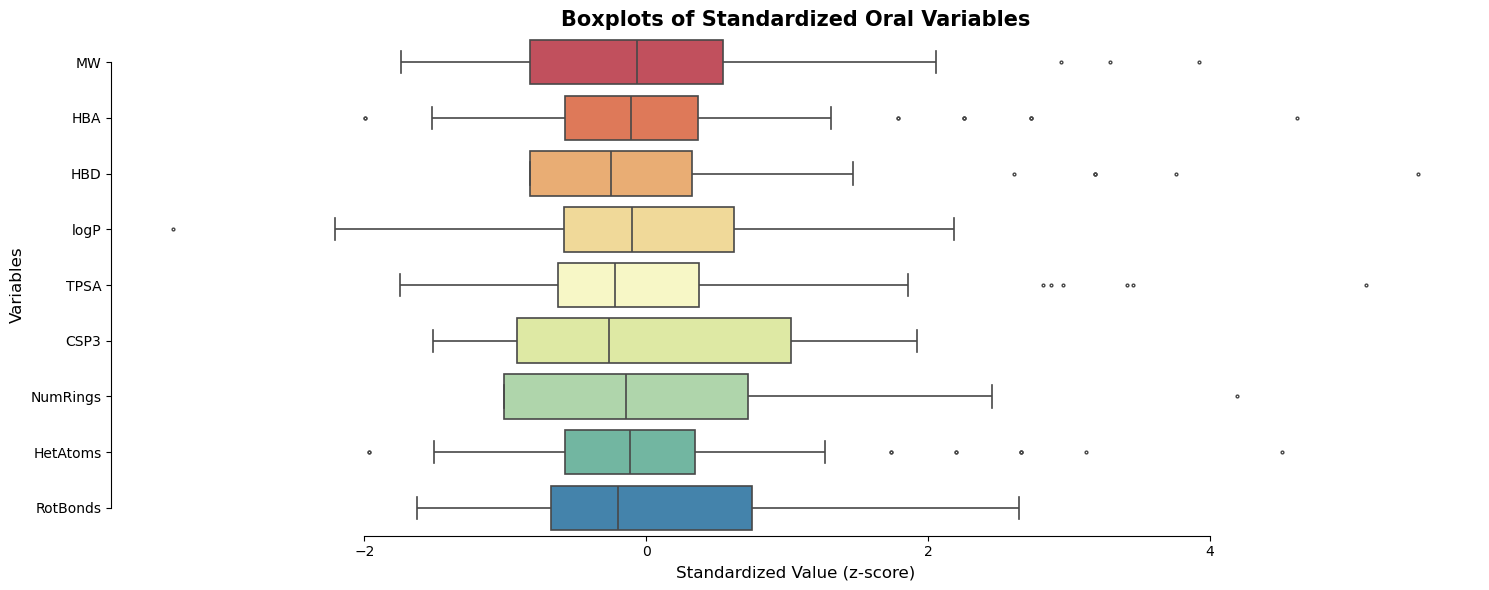

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- Standardize the dataset ---
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_oral)

# Create a new normalized dataframe
df_scaled = pd.DataFrame(scaled_values, columns=df_oral.columns)

# --- Boxplot visualization ---
plt.figure(figsize=(15, 6))

ax = sns.boxplot(
    data=df_scaled,
    orient="h",
    palette="Spectral",   # smoother & more aesthetic than "rainbow"
    linewidth=1.2,
    fliersize=2
)

# Titles and labels
ax.set_title("Boxplots of Standardized Oral Variables", fontsize=15, fontweight="bold")
ax.set_xlabel("Standardized Value (z-score)", fontsize=12)
ax.set_ylabel("Variables", fontsize=12)

sns.despine(trim=True)

plt.tight_layout()
plt.show()

In [18]:
df_oral["np_classifier_class"] = df["np_classifier_class"]

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\2272121120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oral["np_classifier_class"] = df["np_classifier_class"]


In [19]:
df_oral

MW  HBA  HBD     logP    TPSA      CSP3  NumRings  HetAtoms  \
0    346.141638    6    2  1.05760   93.06  0.473684         3         6   
1    342.110338    6    0  3.49440   67.13  0.210526         3         6   
2    416.125988    6    2  4.38150   93.06  0.120000         4         6   
3    240.078644    3    0  3.26322   39.44  0.133333         3         3   
4    274.120509    4    0  3.31890   48.67  0.312500         2         4   
..          ...  ...  ...      ...     ...       ...       ...       ...   
134  408.193674    5    3  5.52960   86.99  0.320000         3         5   
135  230.130680    2    0  3.99962   30.21  0.400000         2         2   
136  264.136159    4    2  1.18220   66.76  0.666667         3         4   
137  398.113231    7    2  0.85260  105.59  0.684211         4         8   
138  296.125988    6    3 -0.49170   99.52  0.800000         4         6   

     RotBonds          np_classifier_class  
0           3     Guaiane sesquiterpenoids  
1           5                     Flavones  
2           6                    Chalcones  
3           1             Simple coumarins  
4           4             Simple coumarins  
..        ...                          ...  
134         7                    Chalcones  
135         0  Germacrane sesquiterpenoids  
136         0     Guaiane sesquiterpenoids  
137         2     Guaiane sesquiterpenoids  
138         0     Guaiane sesquiterpenoids  

[139 rows x 10 columns]

In [20]:
df_oral.to_csv('oral.csv')

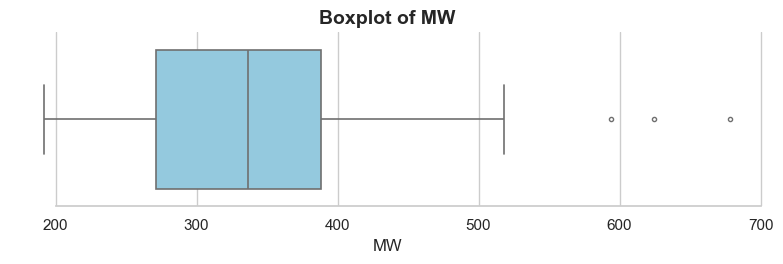

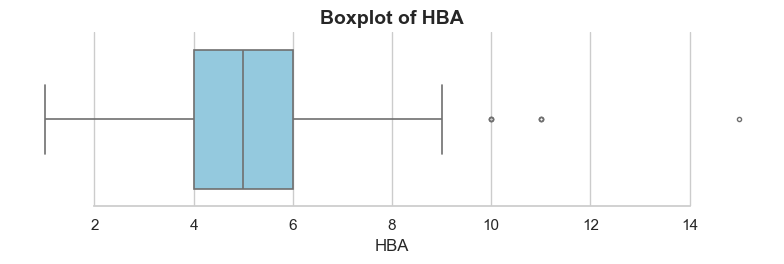

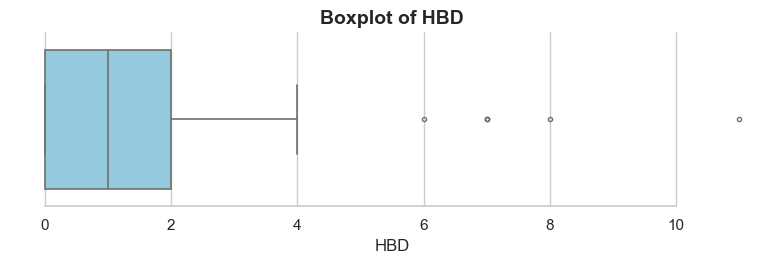

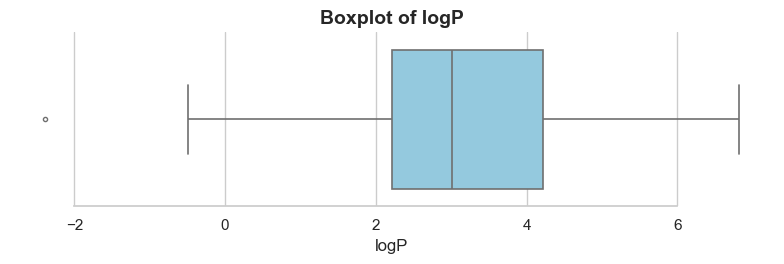

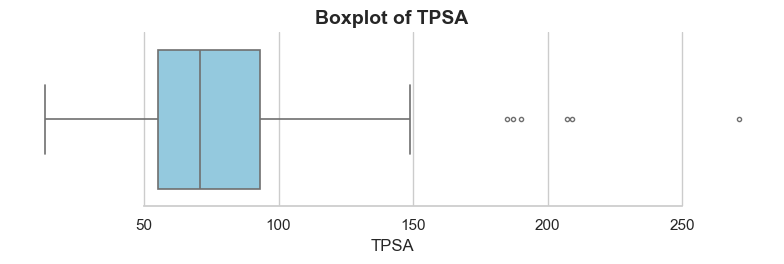

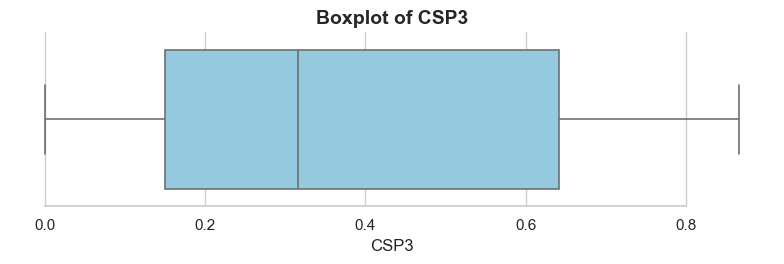

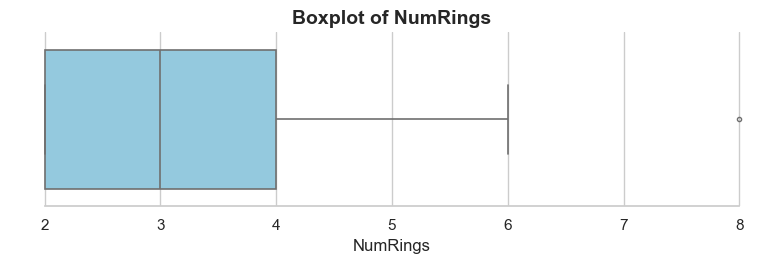

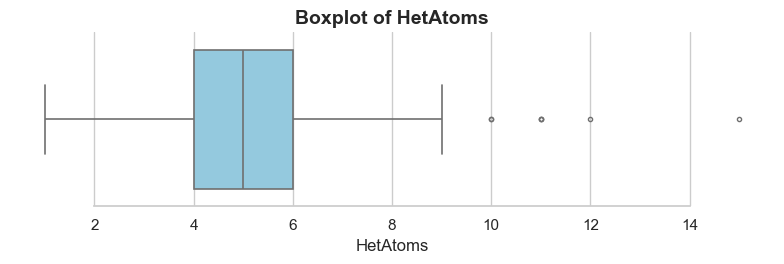

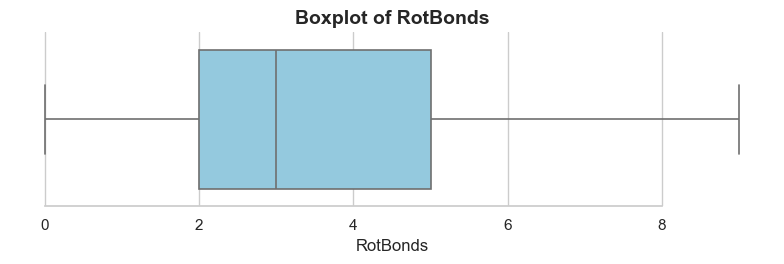

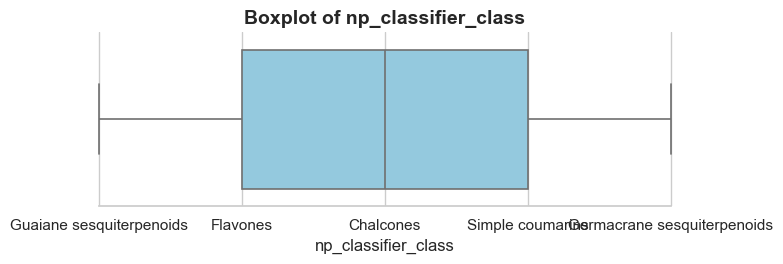

In [21]:
# Ensure clean aesthetics
sns.set(style="whitegrid")

for col in df_oral.columns:
    plt.figure(figsize=(8, 2.8))
    ax = sns.boxplot(
        x=df_oral[col],
        color="skyblue",
        linewidth=1.2,
        fliersize=3
    )
    
    # Title and labels
    plt.title(f"Boxplot of {col}", fontsize=14, fontweight="bold")
    plt.xlabel(col, fontsize=12)
    
    sns.despine(trim=True)
    plt.tight_layout()
    plt.show()


C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\3731249775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


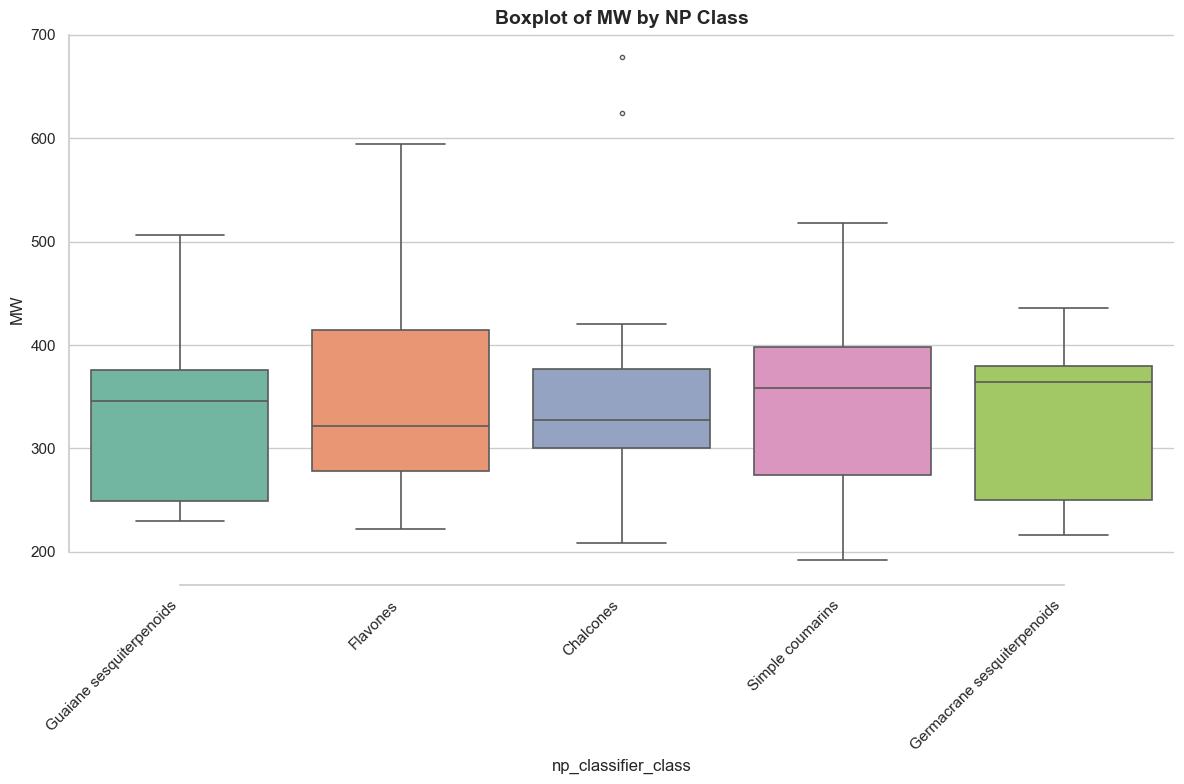

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\3731249775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


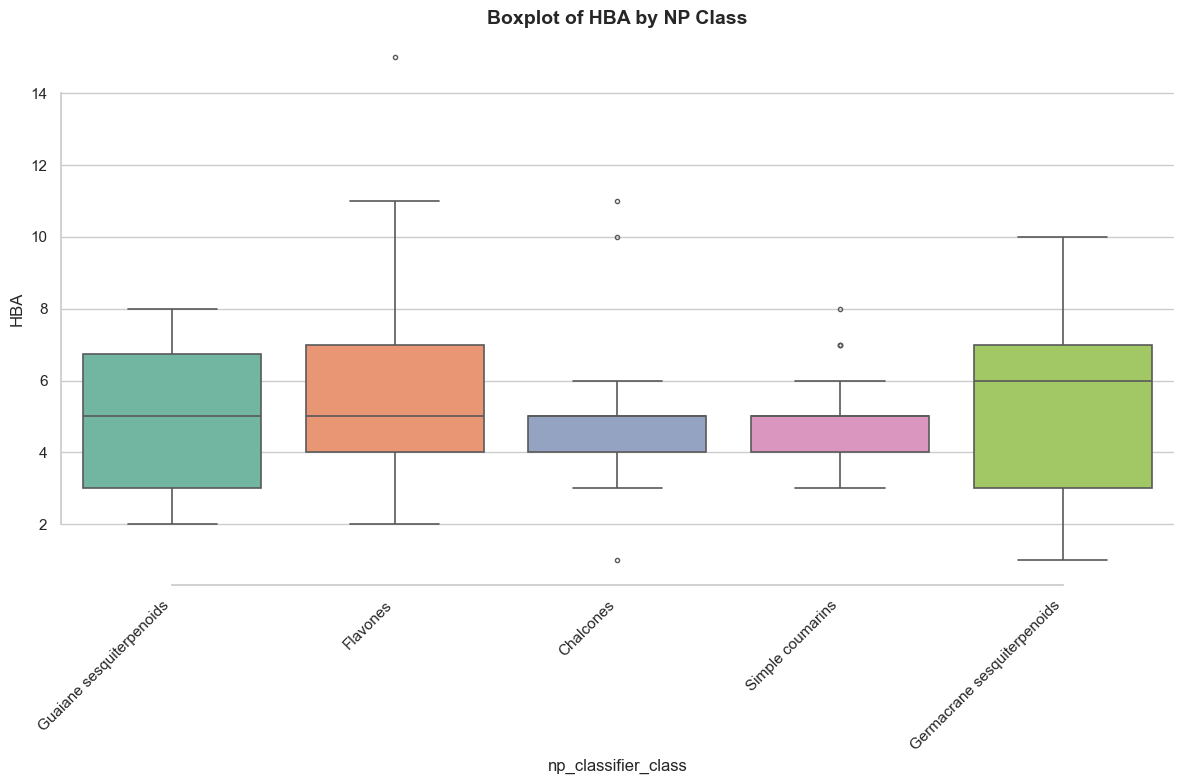

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\3731249775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


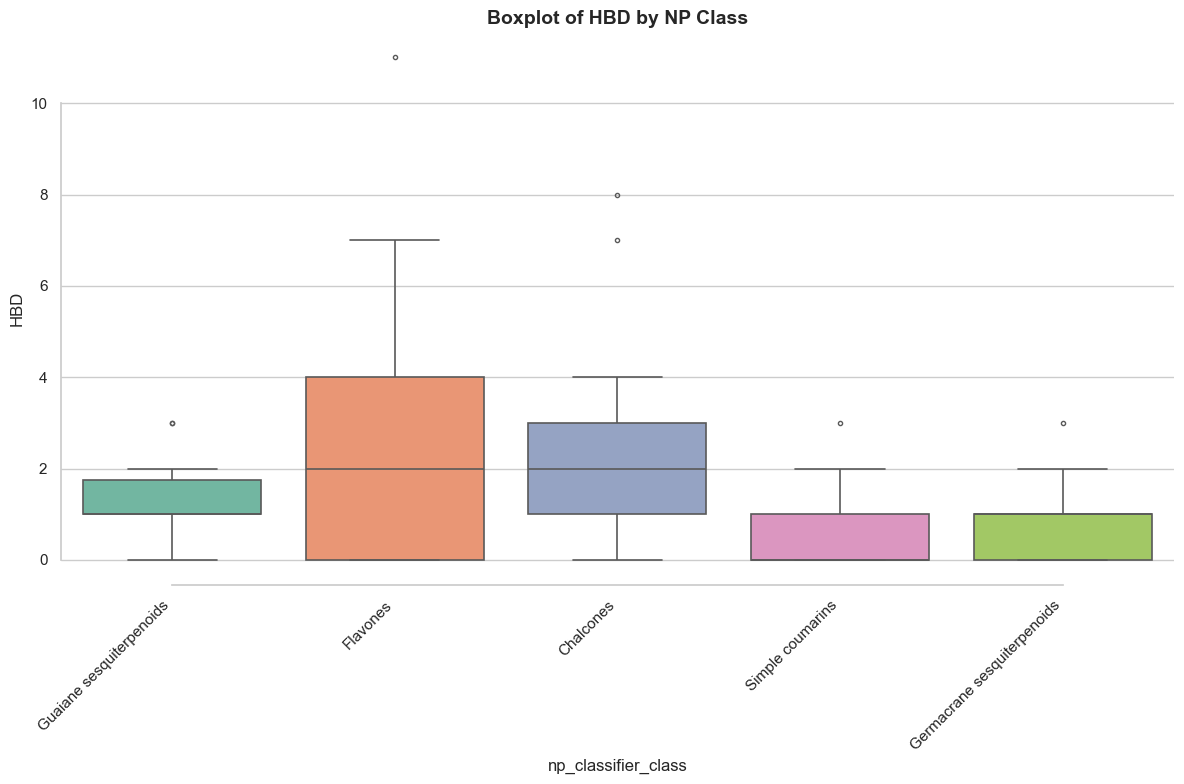

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\3731249775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


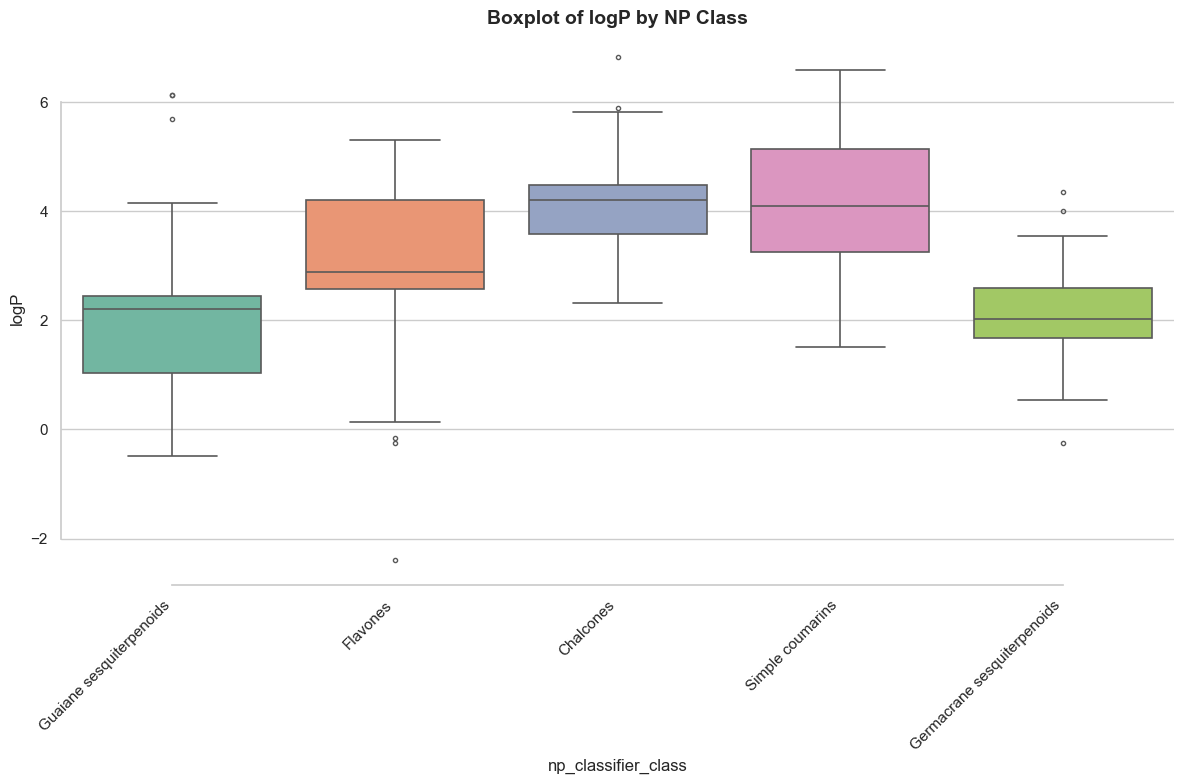

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\3731249775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


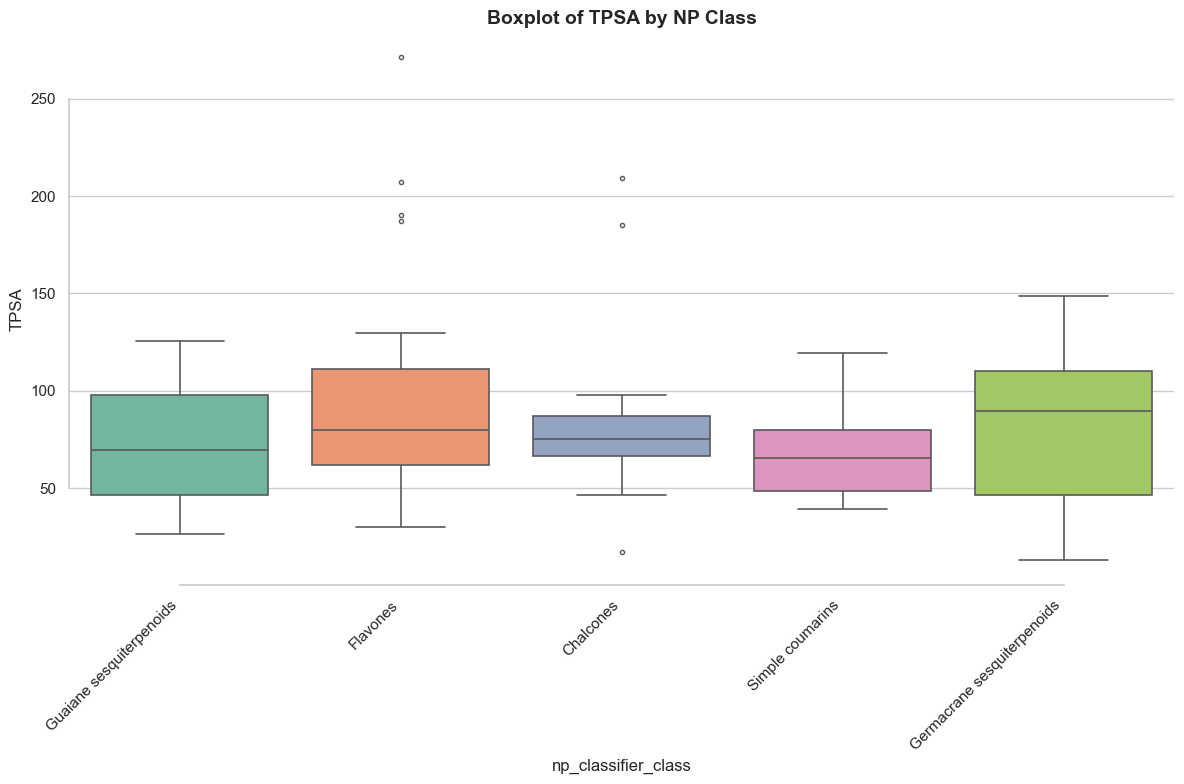

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\3731249775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


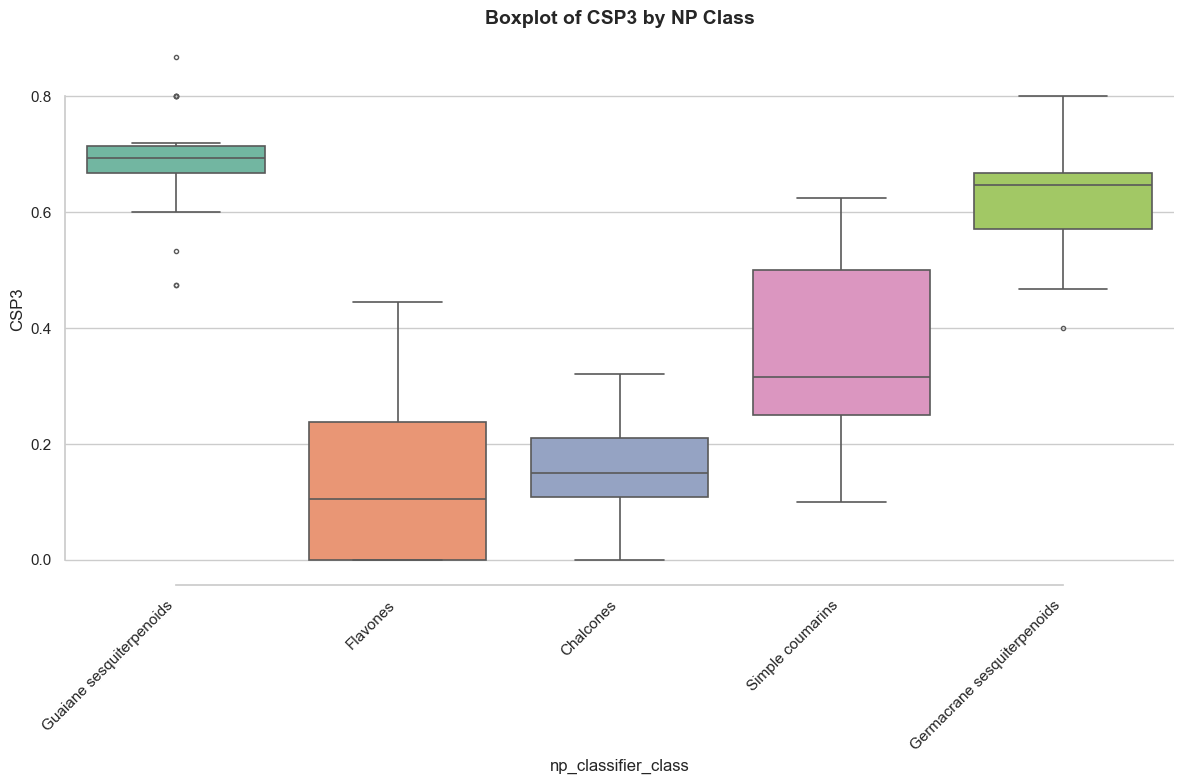

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\3731249775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


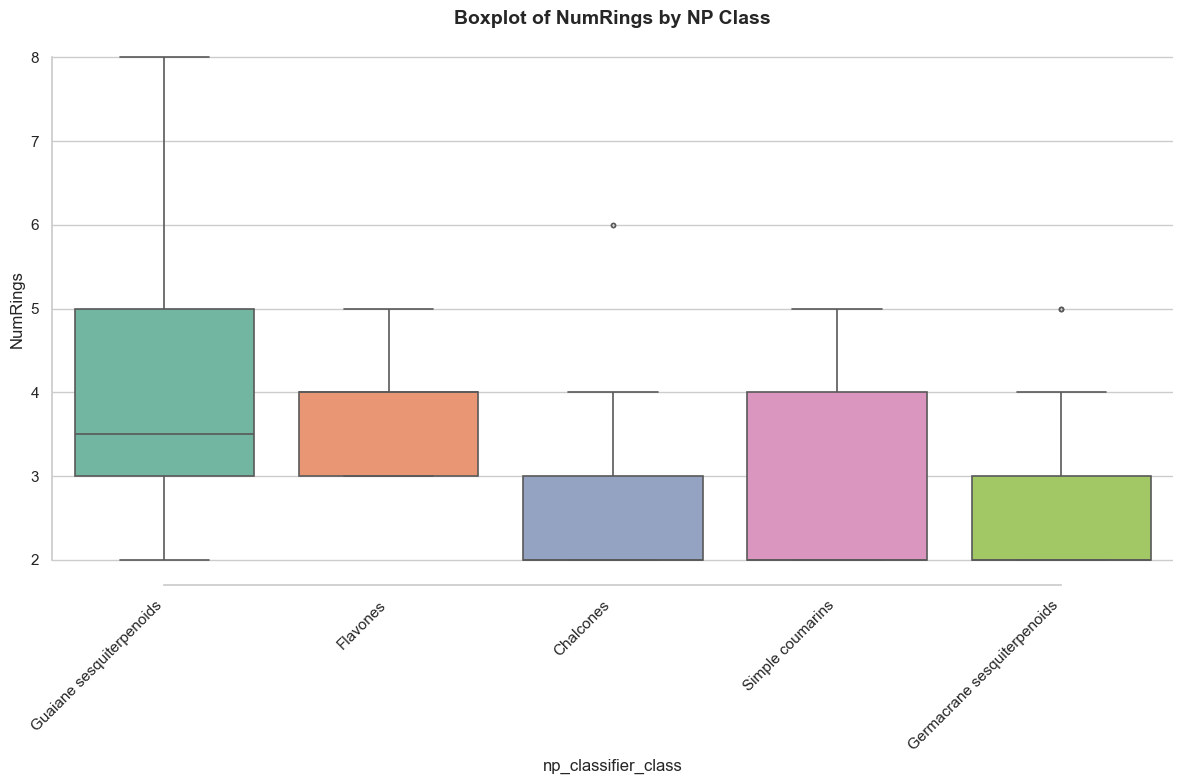

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\3731249775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


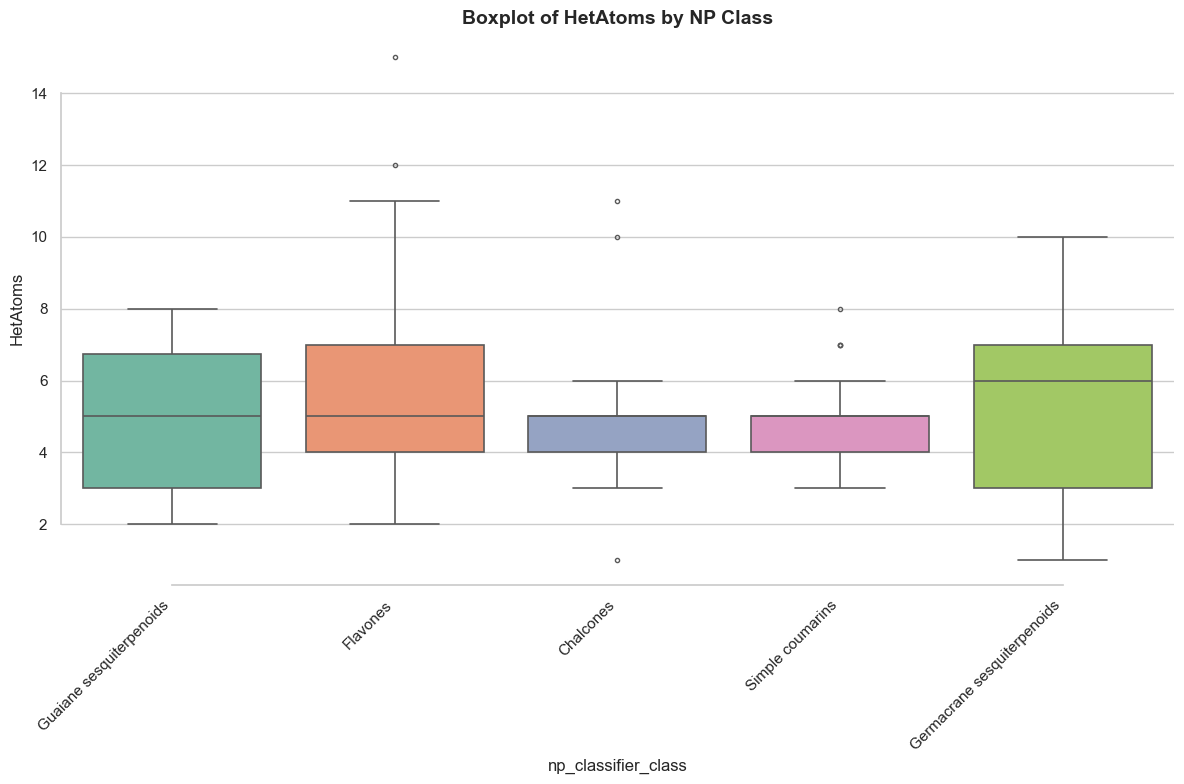

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\3731249775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


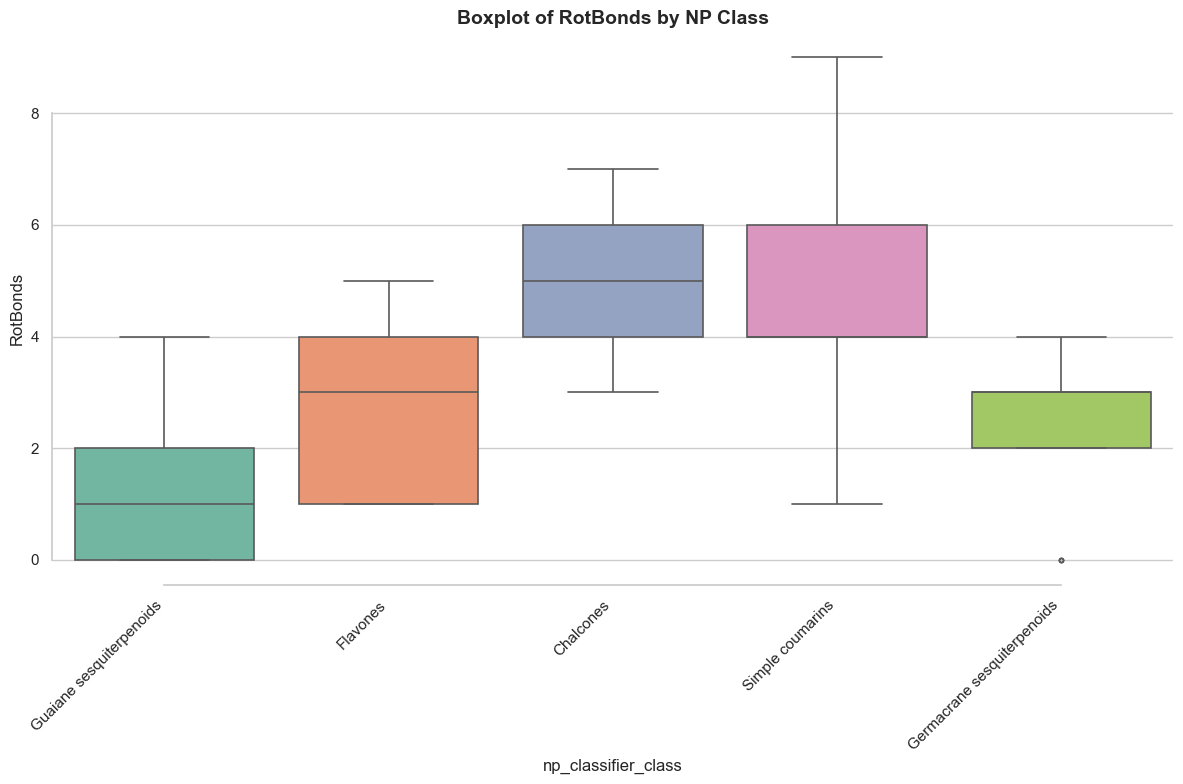

In [31]:
#Boxplots individuales de las propiedades fisicoquímicas agrupadas por clase de producto natural
sns.set(style="whitegrid")

# Select only numeric columns (avoid errors)
numeric_cols = df_oral.select_dtypes(include=["float", "int"]).columns

# Loop through each numeric variable
for col in numeric_cols:
    plt.figure(figsize=(12, 8))
    
    sns.boxplot(
        data=df_oral,
        x="np_classifier_class",
        y=col,
        palette="Set2",
        linewidth=1.2,
        fliersize=3
    )
    
    # Titles and labels
    plt.title(f"Boxplot of {col} by NP Class", fontsize=14, fontweight="bold")
    plt.ylabel(col, fontsize=12)
    
    plt.xticks(rotation=45, ha="right")  # improve readability for categories
    sns.despine(trim=True)
    plt.tight_layout()
    plt.show()


C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\3173935536.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_oral, x="MW", palette="Set2",)


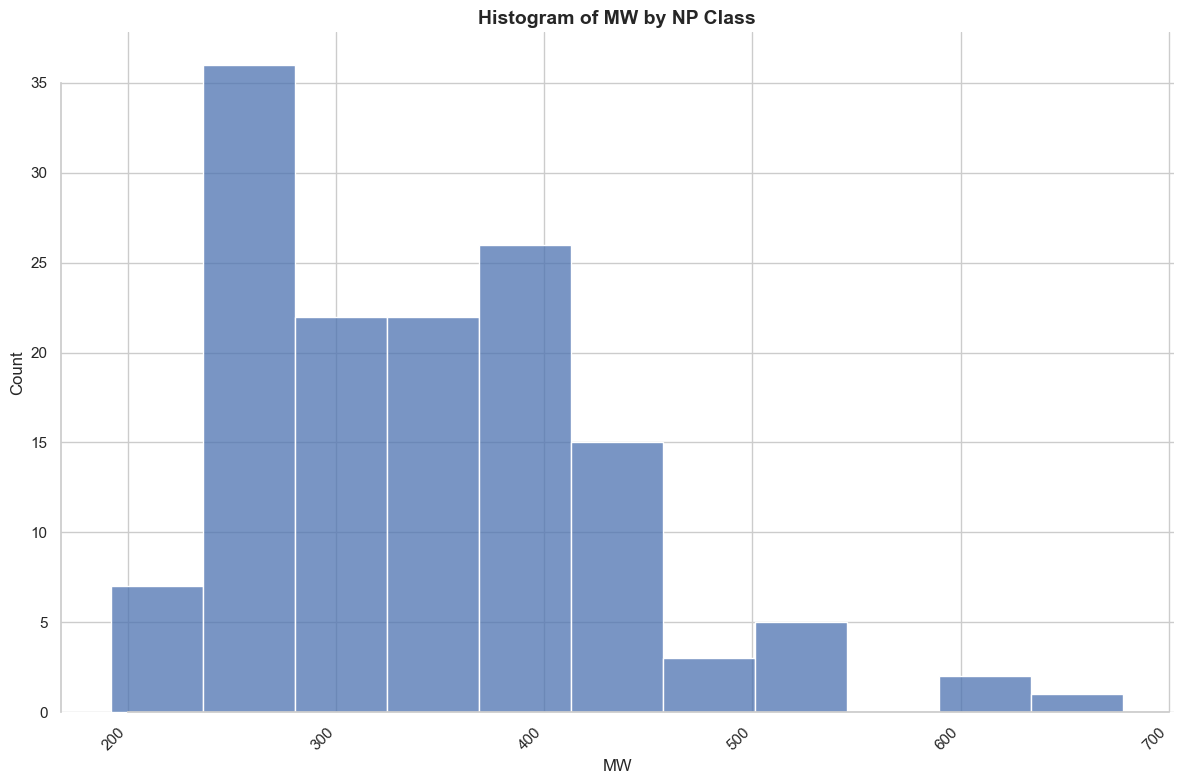

In [37]:
sns.set(style="whitegrid")

# Select only numeric columns (avoid errors)
numeric_cols = df_oral.select_dtypes(include=["float", "int"]).columns

# Loop through each numeric variable

plt.figure(figsize=(12, 8))
    
sns.histplot(data=df_oral, x="MW", palette="Set2",)
    
    # Titles and labels
plt.title(f"Histogram of MW by NP Class", fontsize=14, fontweight="bold")
    
    
plt.xticks(rotation=45, ha="right")  # improve readability for categories
sns.despine(trim=True)
plt.tight_layout()
plt.show()


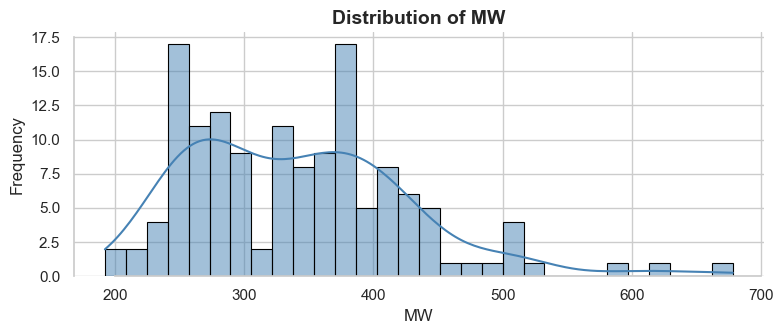

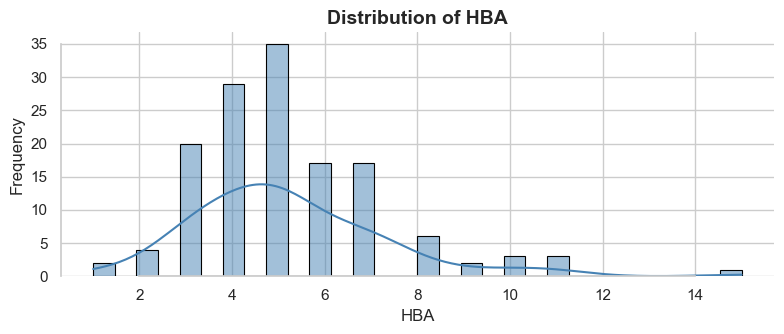

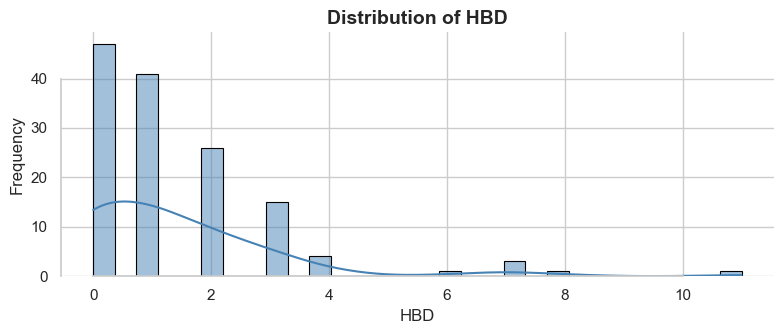

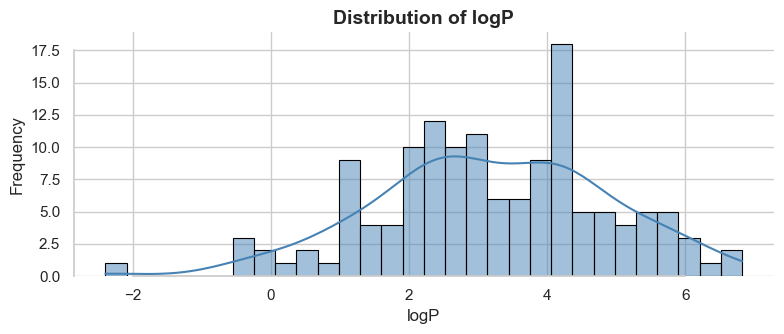

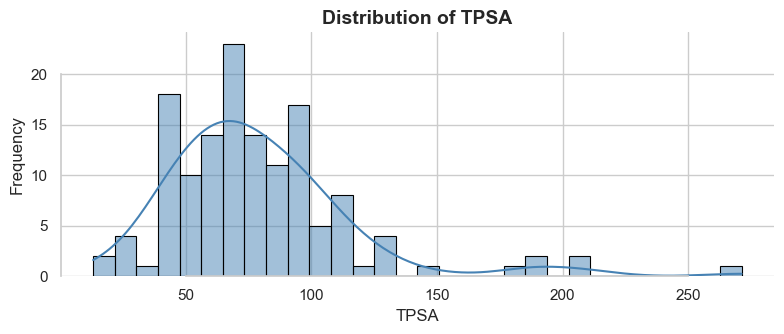

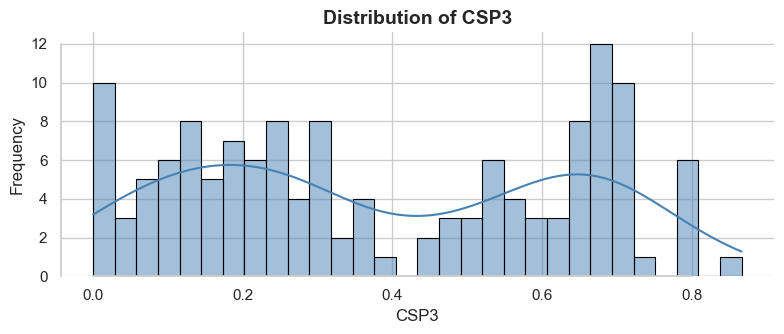

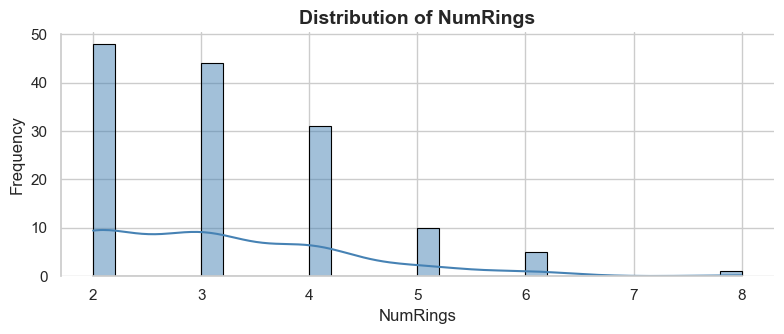

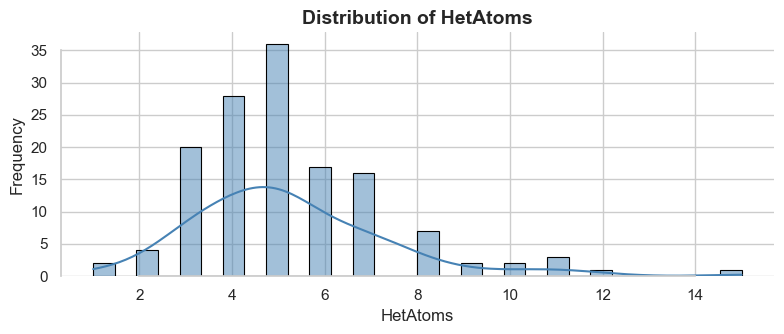

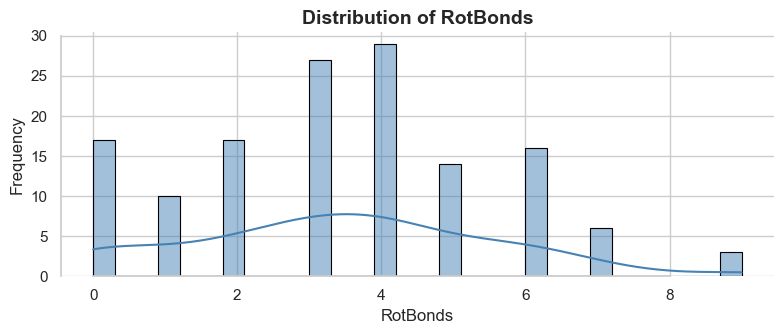

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# List of descriptors you want to plot
prop = [
    "MW", "HBA", "HBD", "logP", "TPSA",
    "CSP3", "NumRings", "HetAtoms", "RotBonds"
]

# Loop through descriptors that exist in the dataframe
for col in prop:
    if col in df_oral.columns:
        plt.figure(figsize=(8, 3.5))

        sns.histplot(
            df_oral[col],
            kde=True,
            bins=30,
            color="steelblue",
            edgecolor="black",
            linewidth=0.8
        )

        plt.title(f"Distribution of {col}", fontsize=14, fontweight="bold")
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)

        sns.despine(trim=True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Column '{col}' not found in df_oral")


## Diagramas de violín
Los violin plots pueden usarse para visualizar la información contenida en un boxplot, es decir, la media, los cuartiles y los valores máximo y mínimo, agregando además la información de la distribución de los datos. 

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\2776714878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


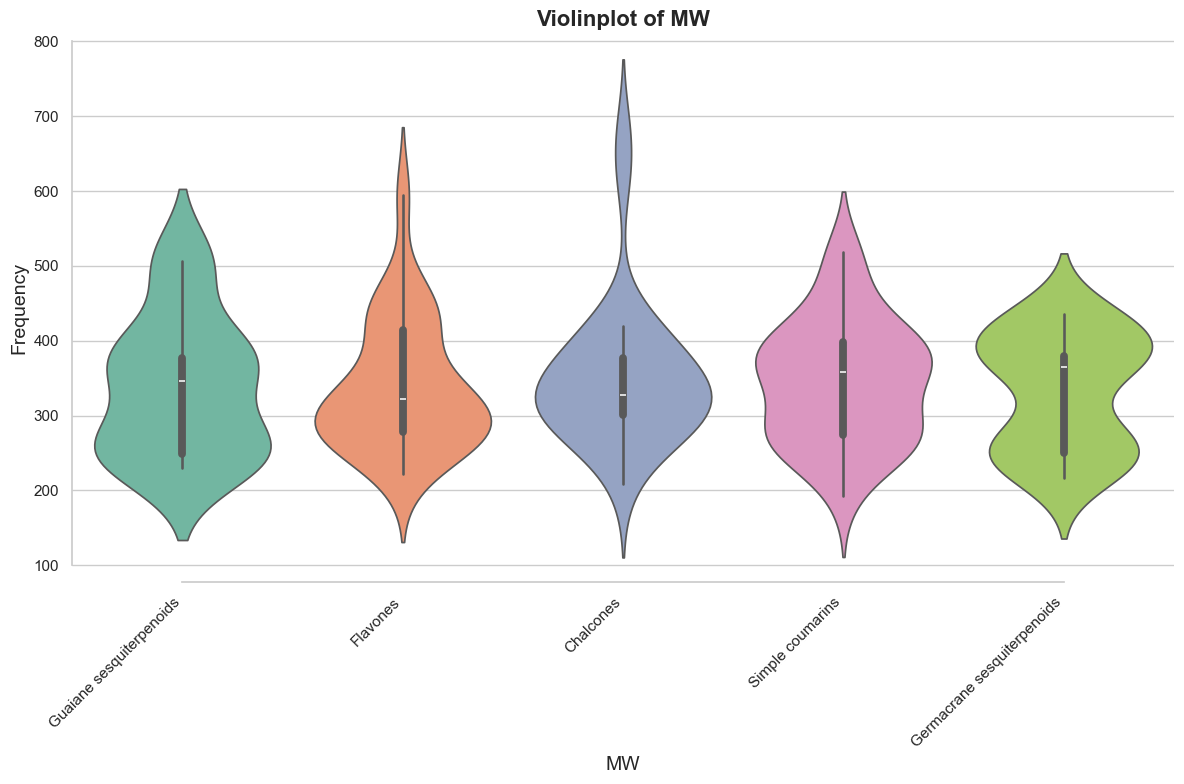

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\2776714878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


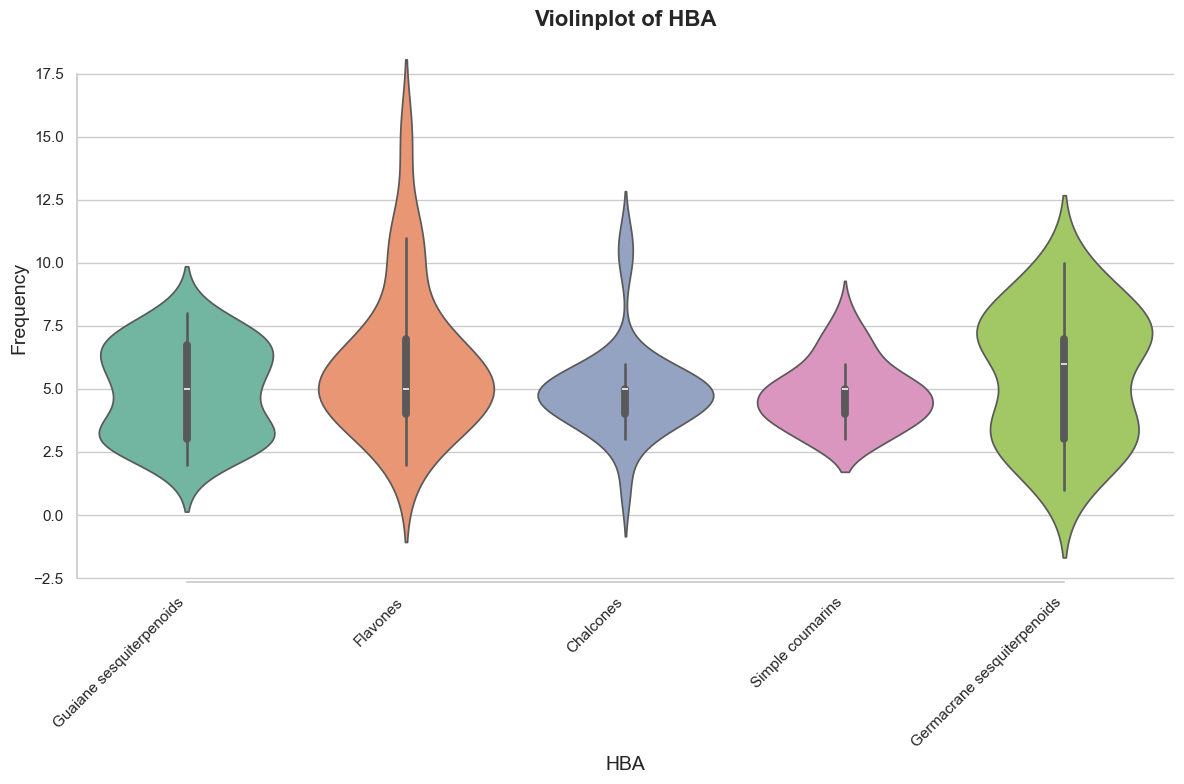

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\2776714878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


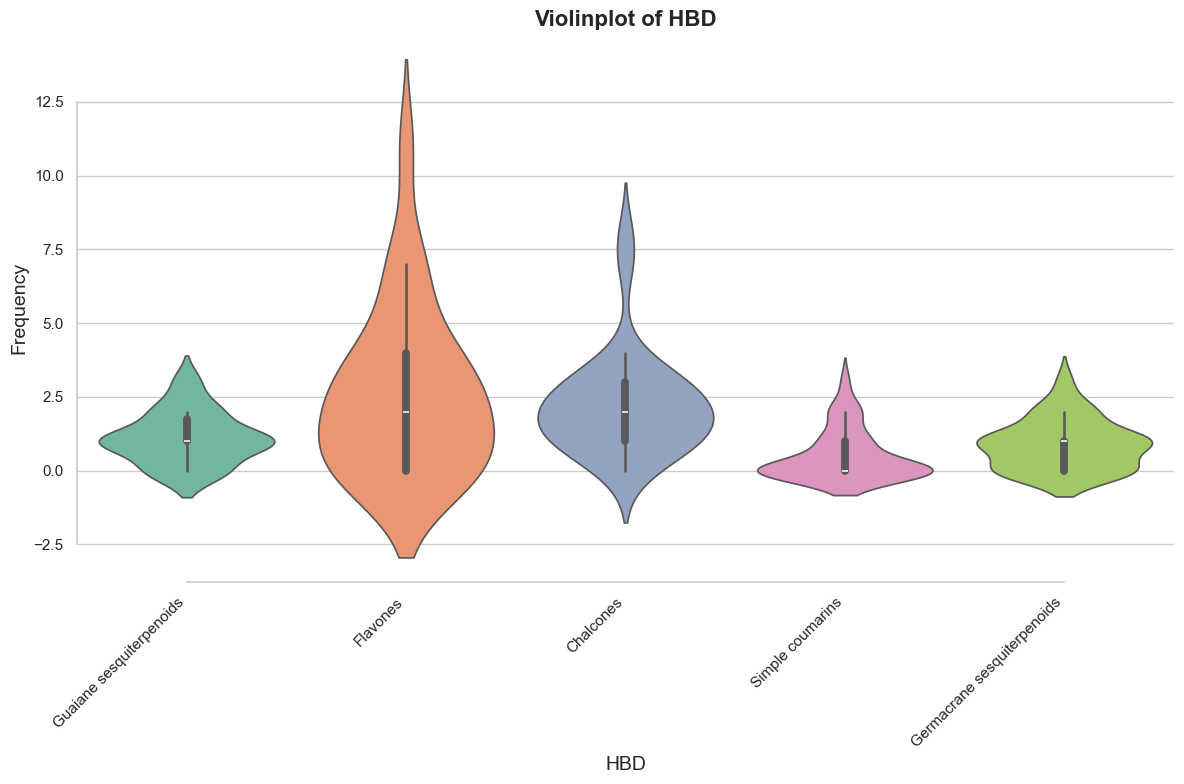

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\2776714878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


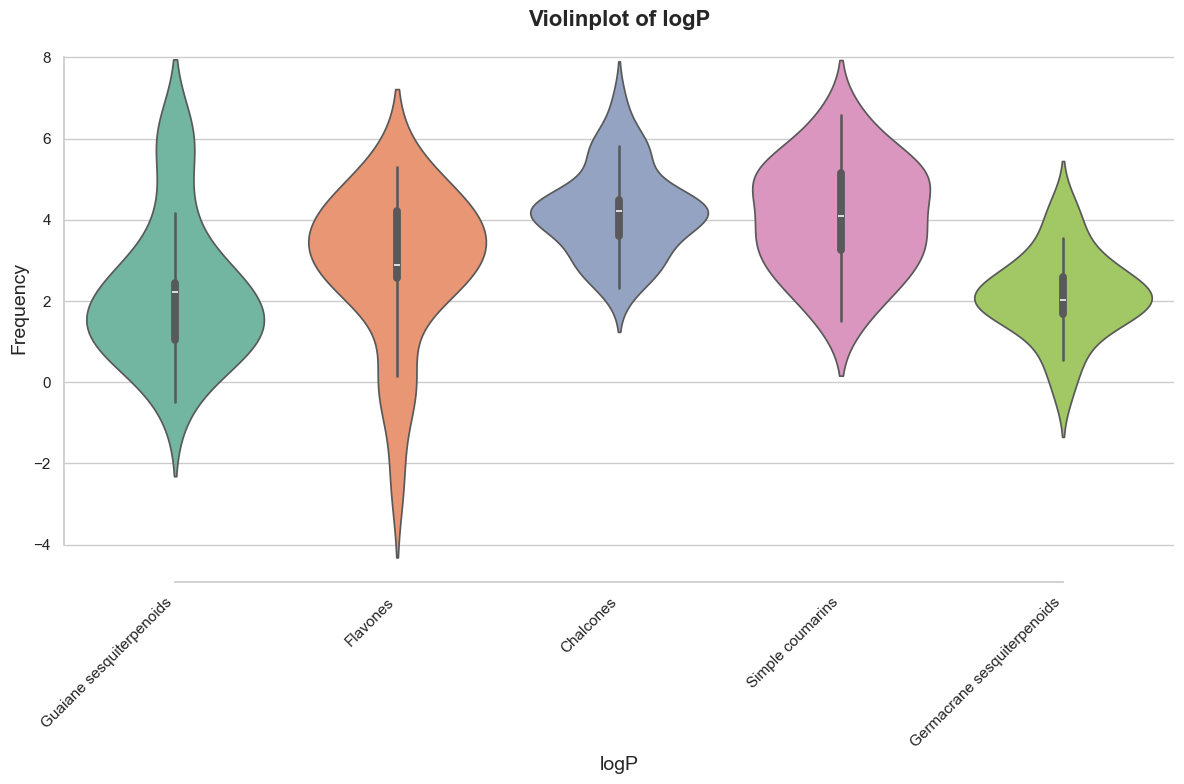

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\2776714878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


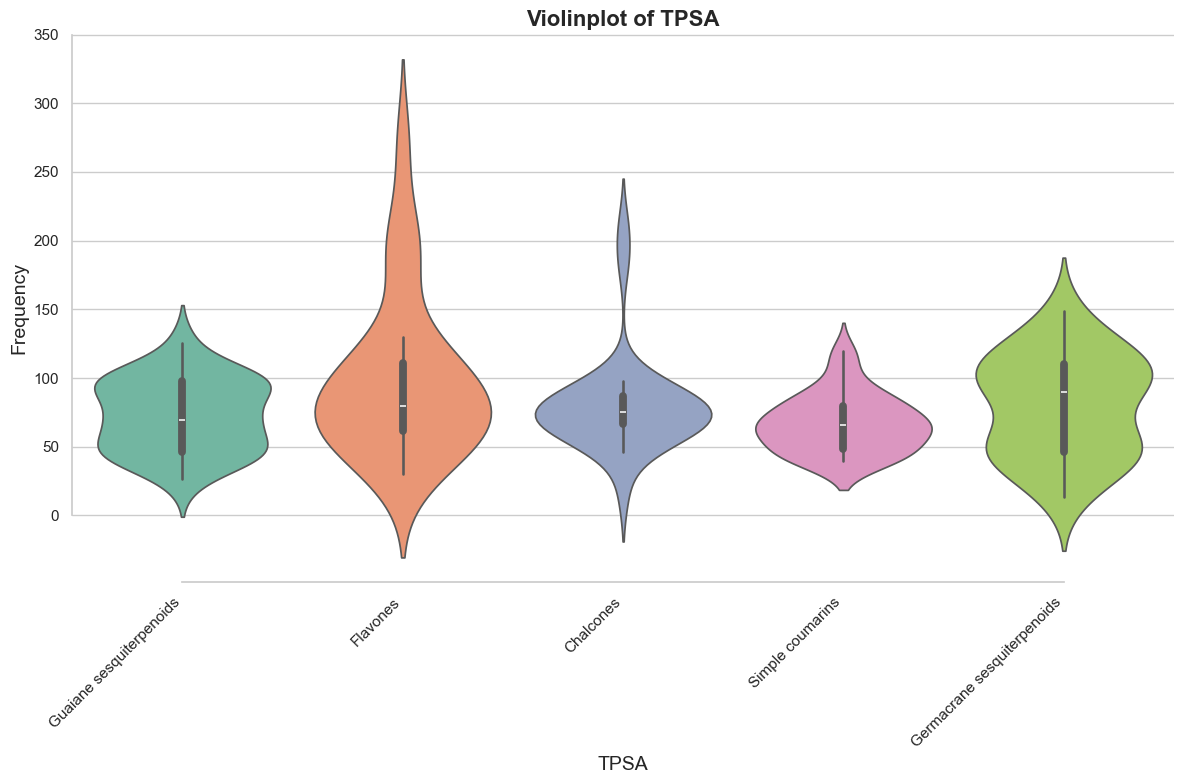

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\2776714878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


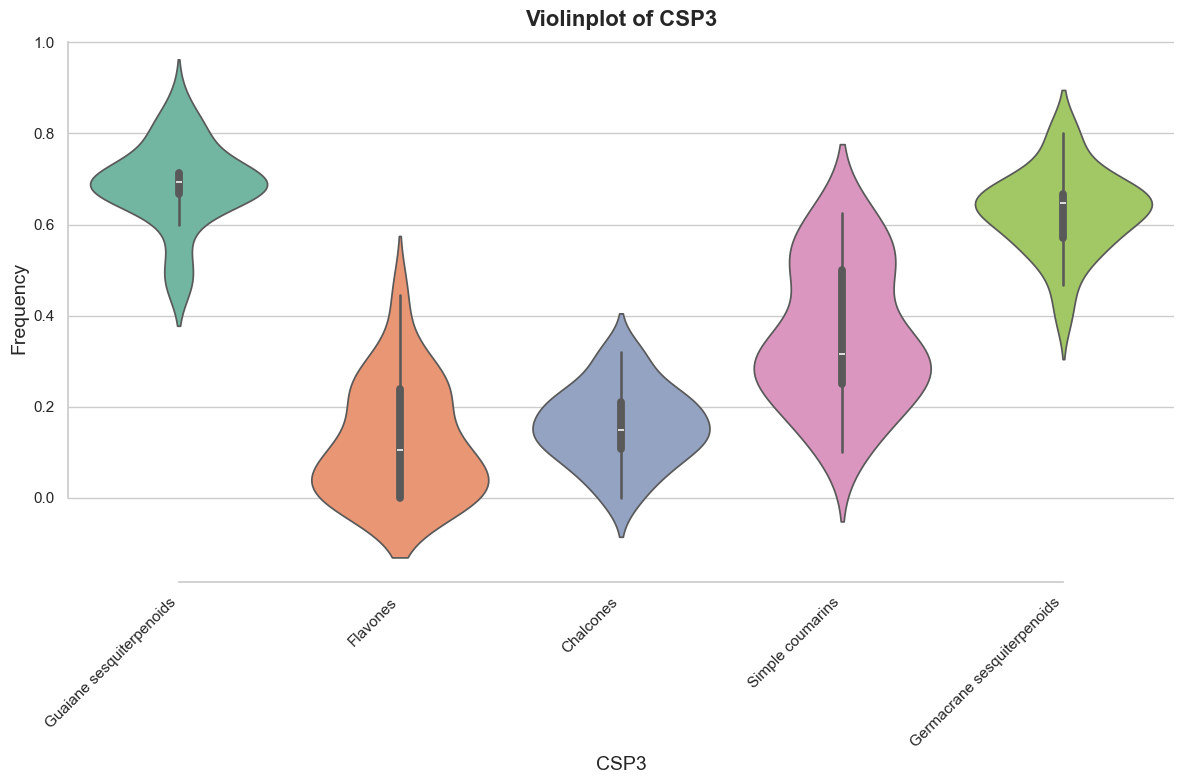

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\2776714878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


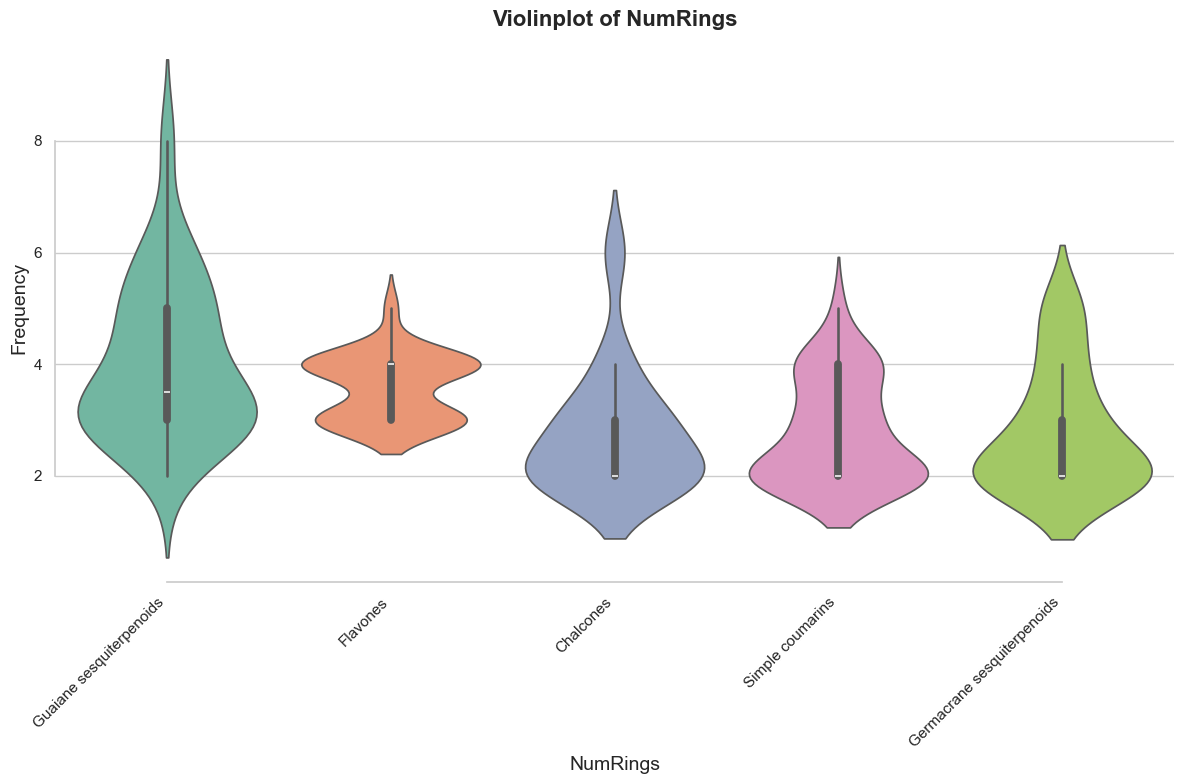

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\2776714878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


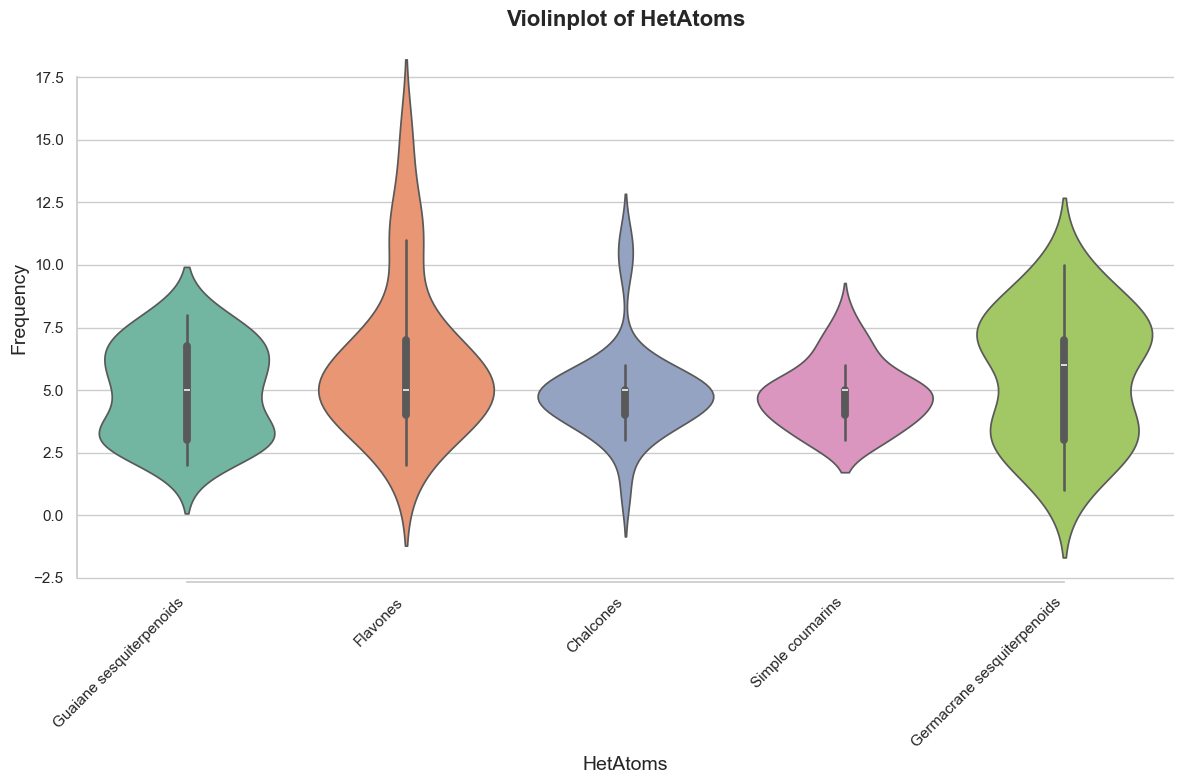

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\2776714878.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


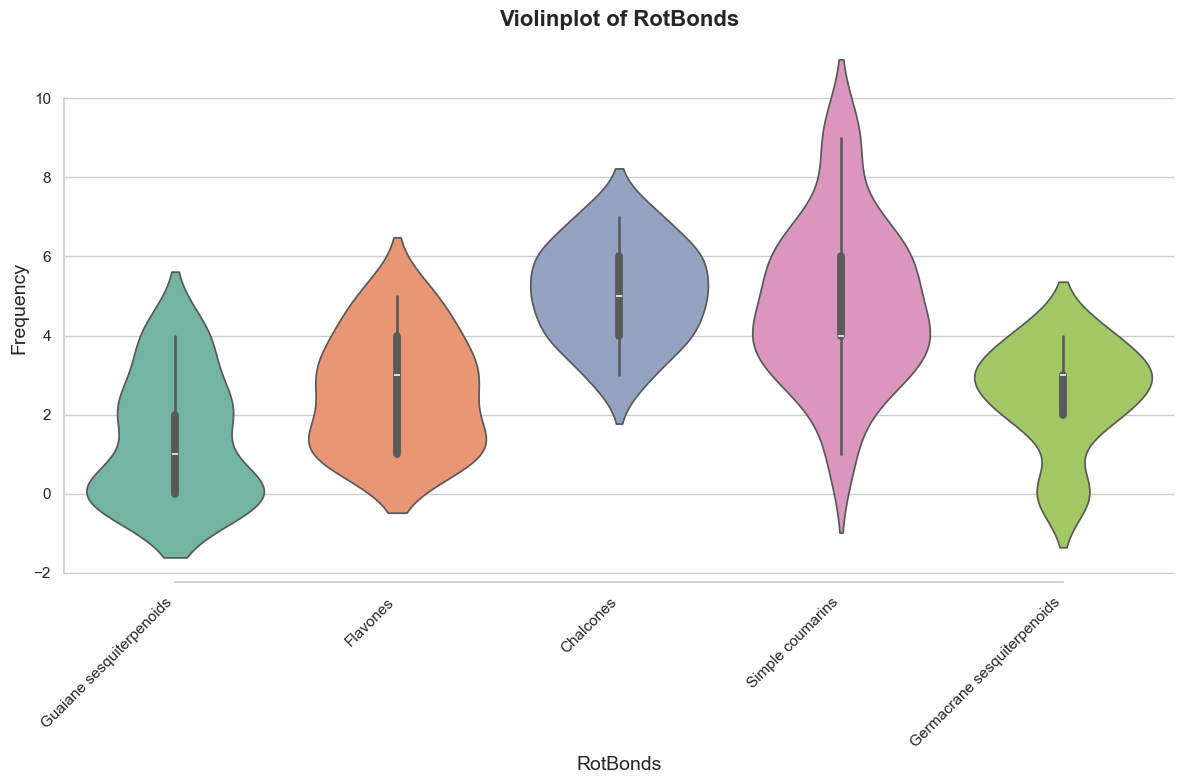

In [46]:
# List of descriptors you want to plot
prop = [
    "MW", "HBA", "HBD", "logP", "TPSA",
    "CSP3", "NumRings", "HetAtoms", "RotBonds"
]

# Loop through descriptors that exist in the dataframe
for col in prop:
    if col in df_oral.columns:
        plt.figure(figsize=(12, 8))

        sns.violinplot(
            data=df_oral,
            x='np_classifier_class',
            y=col,
            palette='Set2',
        )

        plt.title(f"Violinplot of {col}", fontsize=16, fontweight="bold")
        plt.xlabel(col, fontsize=14)
        plt.ylabel("Frequency", fontsize=14)

        plt.xticks(rotation=45, ha="right") 
        sns.despine(trim=True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Column '{col}' not found in df_oral")

## Análisis de correlación
Otro aspecto importante para entender nuestros datos es estudiar la correlación entre las variables. Si queremos, por ejemplo, observar la correlación entre logP y TPSA, podemos hacer este gráfico de dispersión con histogramas marginales usando "sns.jointplot".


## Pair Plot
Otra forma de visualizar la correlación entre las variables es trazar una matriz de correlación con la función pairplot de Seaborn. Por ejemplo, acá trazamos la correlación de seis de las columnas del dataset: "logP", "TPSA", "MW", "RotBonds", "HBD" y "HBA".


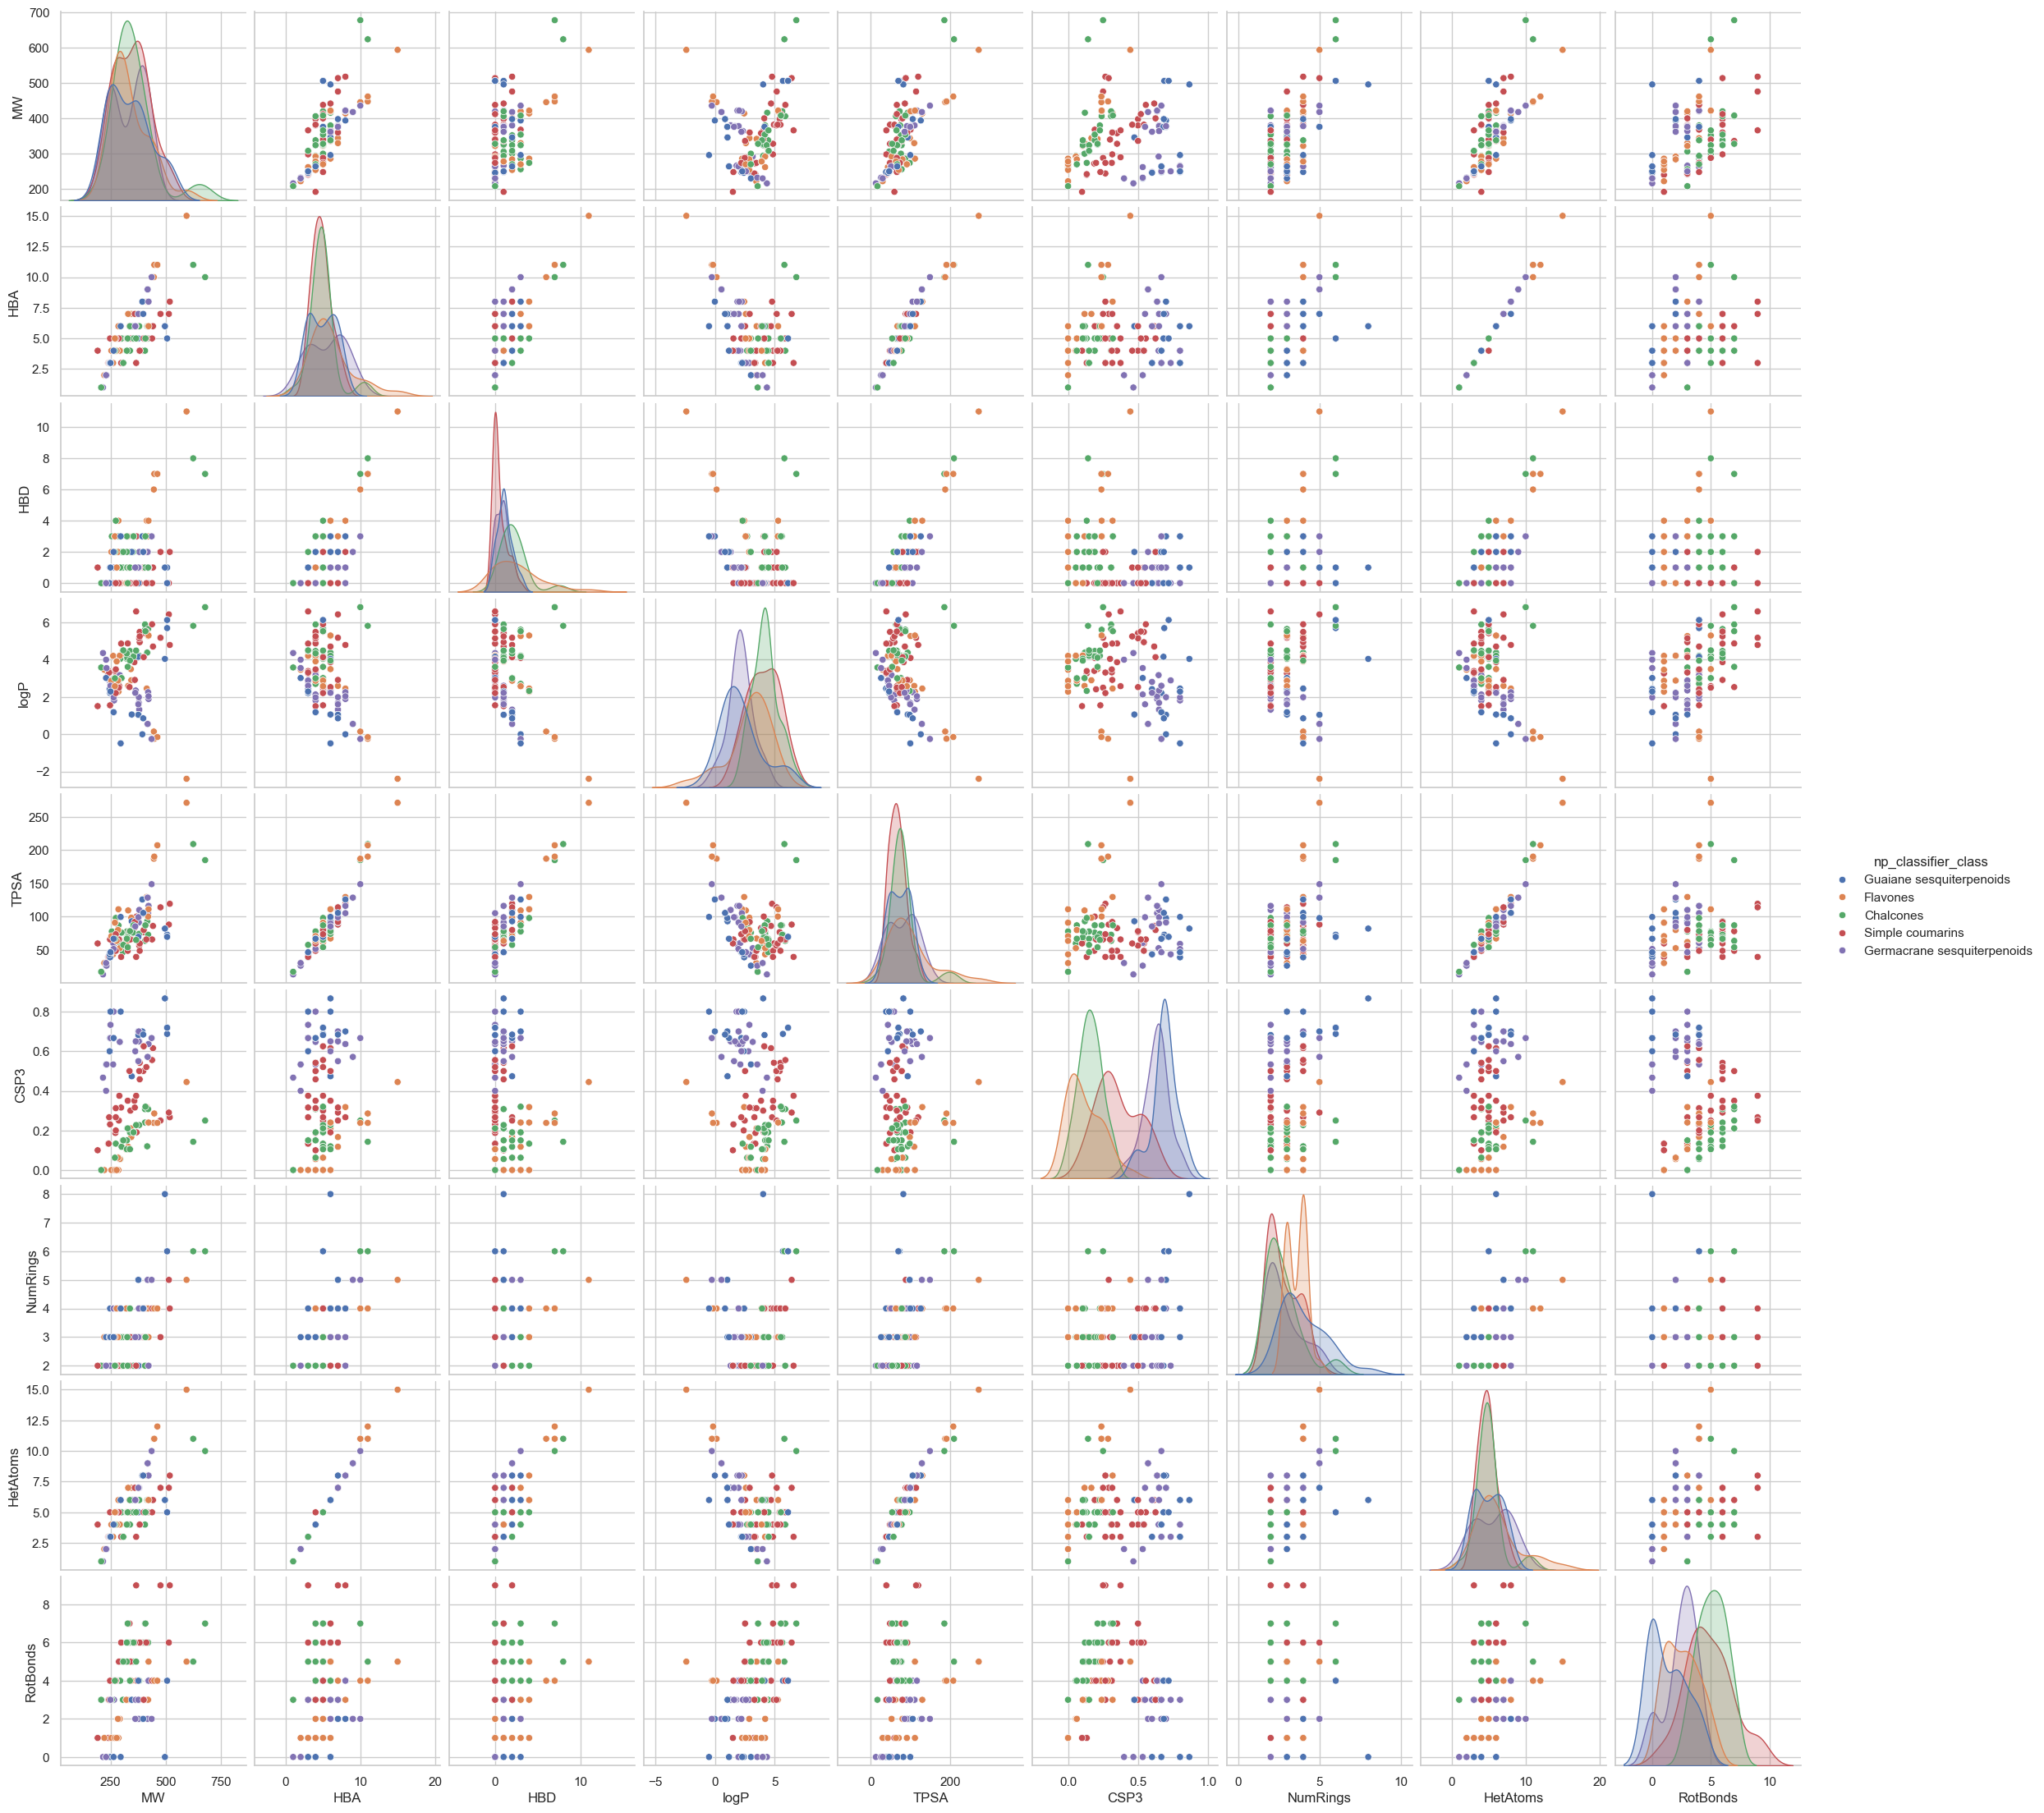

In [49]:
sns.pairplot(data=df_oral, hue='np_classifier_class')

C:\Users\Usuario X\anaconda3\envs\data_env\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\Usuario X\anaconda3\envs\data_env\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\Usuario X\anaconda3\envs\data_env\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\Usuario X\anaconda3\envs\data_env\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This

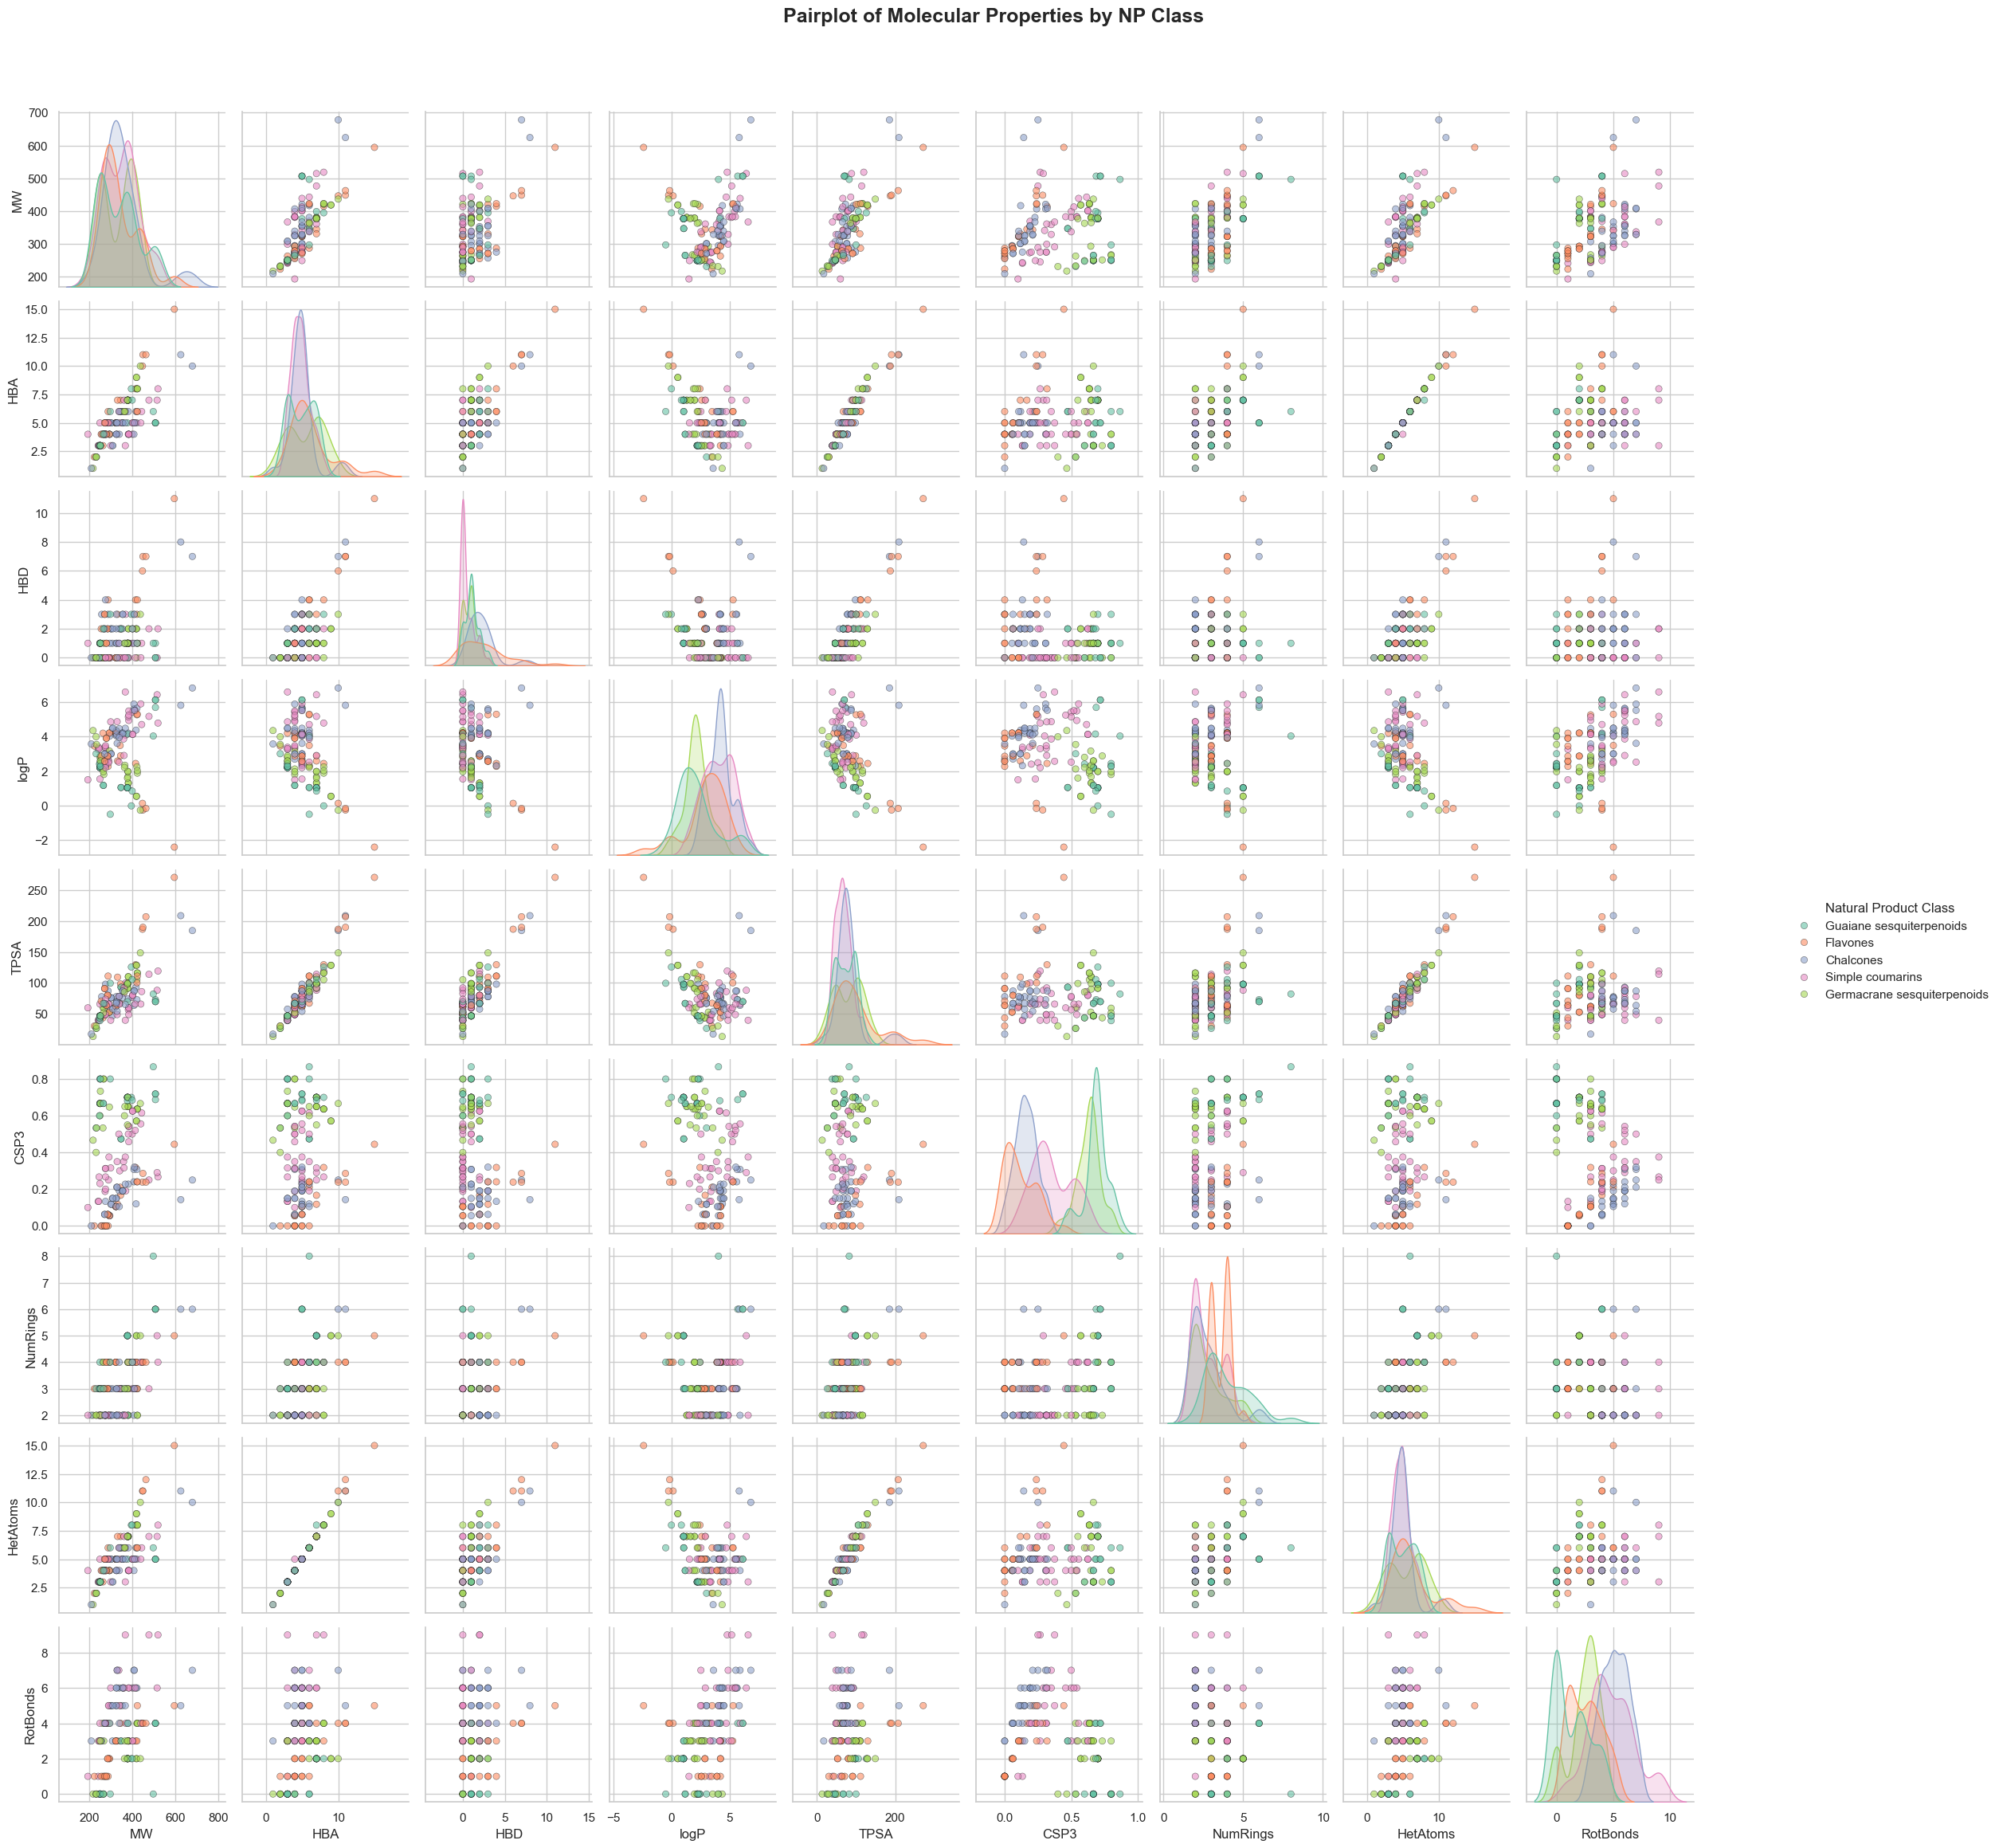

In [68]:
sns.set_style("whitegrid")

pair = sns.pairplot(
    df_oral,
    hue="np_classifier_class",
    diag_kind="kde",
    corner=False,
    plot_kws={
        "alpha": 0.6,
        "s": 35,
        "edgecolor": "k",
        "linewidth": 0.4
    },
    diag_kws={
        "shade": True,
        "bw_adjust": 0.8
    },
    palette="Set2"
)
# ---- CHANGE LEGEND BOX NAME ----
legend = pair._legend
legend.set_title("Natural Product Class")   # <--- change legend name here
legend.set_bbox_to_anchor((1.0, 0.5))

# Title
pair.fig.suptitle("Pairplot of Molecular Properties by NP Class",
                  y=1.03, fontsize=18, fontweight="bold")

# Adjust layout to make space for legend
plt.tight_layout()
plt.subplots_adjust(right=0.85)
# save figure
plt.savefig('pairplot_properties.png', dpi=300, bbox_inches='tight')
plt.show()


## Coeficiente de correlación de Pearson
Podemos calcular la correlación entre dos variables con el coeficiente de correlación Pearson y el valor p.

El coeficiente de correlación de Pearson (r) nos permite observar fácilmente las dependencias lineales entre dos conjuntos de datos.

Un valor de +1 significa correlación lineal positiva total,
0 significa que no hay correlación lineal, y
-1, correlación lineal negativa total.
Las correlaciones positivas implican que a medida que x aumenta, también lo hace y. Las correlaciones negativas implican que a medida que x aumenta, y disminuye.

El valor p muestra la probabilidad de que dos conjuntos de datos que no están relacionados tengan un coeficiente de correlación de Pearson que sea igual o más extremo que el que se ha encontrado en esos conjuntos de datos. Si esta probabilidad es inferior al 5% (P < 0,05), significa que el coeficiente de correlación es estadísticamente significativo.

## Mapa de calor (heat map)
Los mapas de calor o heat maps son representaciones gráficas que nos permiten observar la correlación entre variables (descriptores) evitando así ruido e información redundante.

Podemos crear un DataFrame con el coeficiente de correlación de Pearson para cada par de columnas (usando la función df.corr()) y luego, usar Matplotlib y Seaborn para crear un heatmap de los coeficientes.


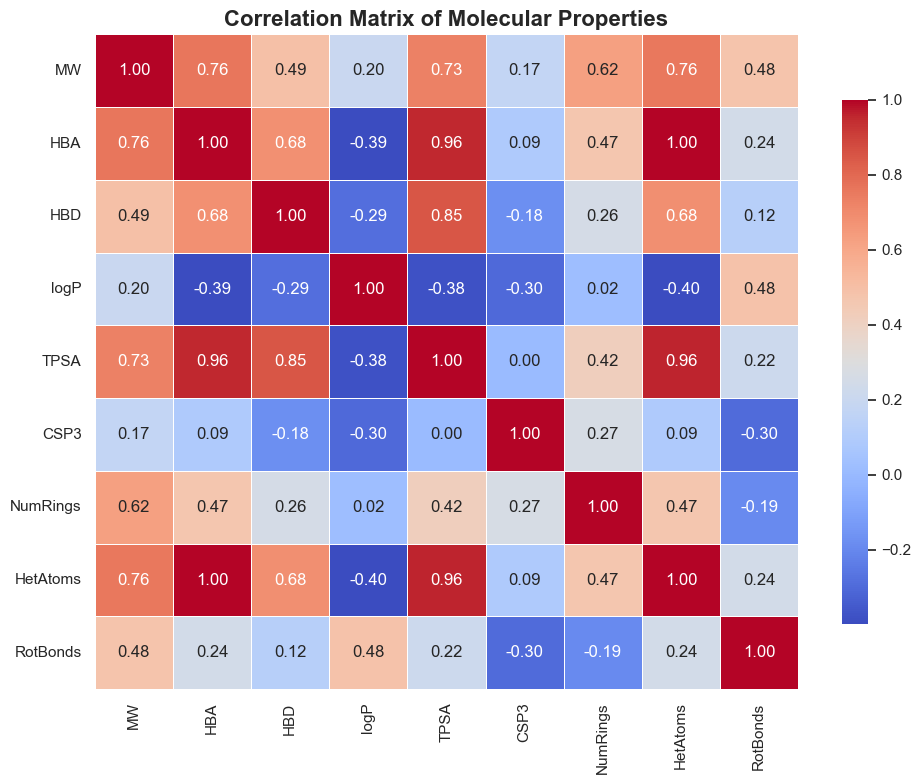

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df_oral.corr(numeric_only=True)

# Set plot style
sns.set_style("white")

plt.figure(figsize=(10, 8))

# Heatmap
sns.heatmap(
    corr,
    annot=True,            # show correlation values
    fmt=".2f",             # format numbers
    cmap="coolwarm",       # color scale
    linewidths=0.5,        # thin grid lines
    cbar_kws={"shrink": 0.8}  # smaller colorbar
)

plt.title("Correlation Matrix of Molecular Properties", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

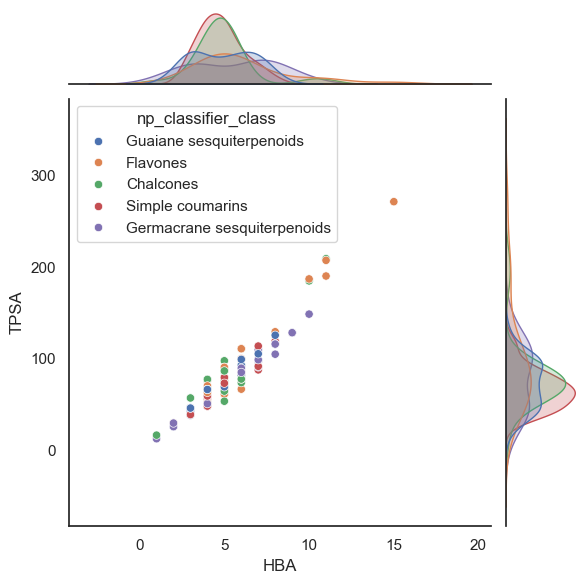

In [71]:
sns.jointplot(data=df_oral, x='HBA', y='TPSA', hue='np_classifier_class')

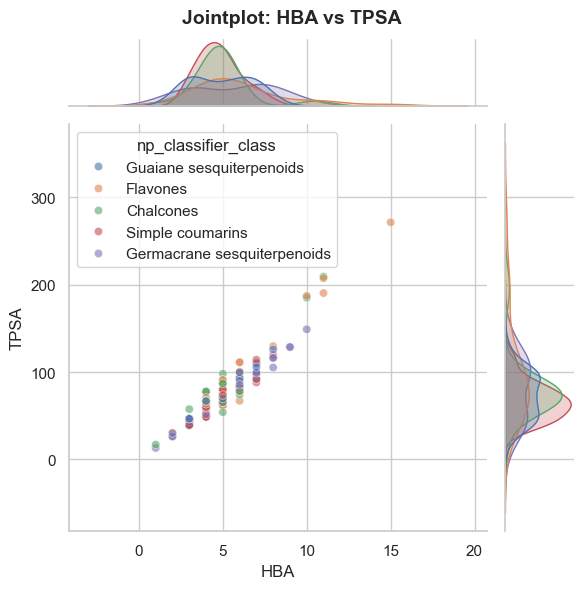

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

jp1 = sns.jointplot(
    data=df_oral,
    x="HBA",
    y="TPSA",
    hue='np_classifier_class',
    kind="scatter",
    height=6,
    color="steelblue",
    alpha=0.6
)

jp1.fig.suptitle("Jointplot: HBA vs TPSA", fontsize=14, fontweight="bold")
jp1.fig.tight_layout()
jp1.fig.subplots_adjust(top=0.93)

plt.show()


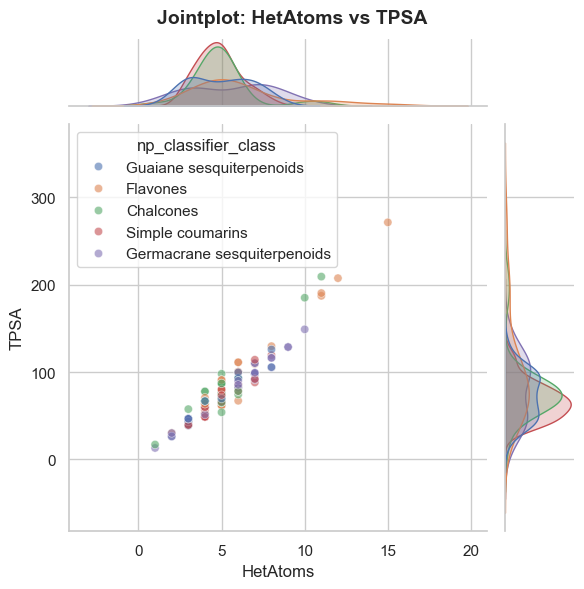

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

jp2 = sns.jointplot(
    data=df_oral,
    x="HetAtoms",
    y="TPSA",
    kind="scatter",
    hue='np_classifier_class',
    height=6,
    color="darkred",
    alpha=0.6
)

jp2.fig.suptitle("Jointplot: HetAtoms vs TPSA", fontsize=14, fontweight="bold")
jp2.fig.tight_layout()
jp2.fig.subplots_adjust(top=0.93)

plt.show()


## Análisis de núcleos base o scaffolds
En esta sección visualizaremos los scaffolds o frameworks de las moléculas presentes en la base de datos y calcularemos su frecuencia. Utilizaremos la definición de Bemis y Murcko, la cual remueve las cadenas laterales de la estructura original manteniendo los anillos y los linkers:

In [78]:
PandasTools.AddMurckoToFrame(df, "ROMol")
df[['canonical_smiles', 'Murcko_SMILES']]

canonical_smiles  \
0    C=C(CO)C(=O)O[C@H]1CC(=C)[C@@H]2C[C@H](O)C(=C)...   
1    COC1=CC=C(C2=CC(=O)C3=C(OC)C(OC)=C(OC)C=C3O2)C=C1   
2    COC1=C(C(=O)CCC2=CC=CC=C2)C(O)=C(O)C2=C1C(=CC1...   
3                  COC1=CC2=CC(C)=CC=C2C2=C1C=CC(=O)O2   
4                 COC1=CC(OC)=C2C=CC(=O)OC2=C1CC=C(C)C   
..                                                 ...   
134  CC(C)=CCC[C@@]1(C)C=CC2=C(C=CC(C(=O)CCC3=CC=C(...   
135                   CC1=CC(=O)C2=C(CC(C)=CCC1)OC=C2C   
136  C=C1C(=O)O[C@H]2CC(=C)[C@H]3CC[C@@](C)(O)[C@@H...   
137  C=C(C)C(=O)O[C@@H]1C[C@H]2C(=C)C(=O)O[C@@H]2[C...   
138  C=C1C(=O)O[C@H]2[C@H]1CC[C@@](C)(O)[C@]13O[C@H...   

                                         Murcko_SMILES  
0    C=C1CC[C@H]2C(=C)CC[C@H]3C(=C)C(=O)O[C@@H]3[C@...  
1                          O=c1cc(-c2ccccc2)oc2ccccc12  
2           O=C1Oc2ccc(C(=O)CCc3ccccc3)cc2C1=Cc1ccccc1  
3                               O=c1ccc2ccc3ccccc3c2o1  
4                                     O=c1ccc2ccccc2o1  
..                                                 ...  
134                   O=C(CCc1ccccc1)c1ccc2c(c1)C=CCO2  
135                              O=C1C=CCCC=CCc2occc21  
136     C=C1C[C@@H]2OC(=O)C(=C)[C@H]2C[C@H]2CCC[C@H]12  
137  C=C1C(=O)O[C@@H]2[C@H]3CC[C@@H]4O[C@@]43CCC[C@...  
138  C=C1C(=O)O[C@@H]2[C@H]3CC[C@@H]4O[C@@]43CCC[C@...  

[139 rows x 2 columns]

identifier                                   canonical_smiles  \
0  CNP0295445.1  C=C(CO)C(=O)O[C@H]1CC(=C)[C@@H]2C[C@H](O)C(=C)...   

                                      standard_inchi  \
0  InChI=1S/C19H22O6/c1-8-5-14(24-18(22)9(2)7-20)...   

            standard_inchi_key          name  \
0  KHSCYOFDKADJDJ-NQLMQOPMSA-N  Cynaropicrin   

                                          iupac_name  annotation_level  \
0  [(3~{a}~{R},4~{S},6~{a}~{R},8~{S},9~{a}~{R},9~...                 5   

   total_atom_count  heavy_atom_count  molecular_weight  ...  HBA HBD    logP  \
0                47                25            346.38  ...    6   2  1.0576   

    TPSA      CSP3  NumRings  HetAtoms  RotBonds  \
0  93.06  0.473684         3         6         3   

                                       Murcko_SMILES  \
0  C=C1CC[C@H]2C(=C)CC[C@H]3C(=C)C(=O)O[C@@H]3[C@...   

                                            scaffold  
0  <rdkit.Chem.rdchem.Mol object at 0x0000020D2A6...  

[1 rows x 56 columns]
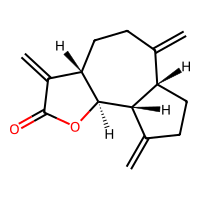

In [79]:
#Añadir una columna con los scaffolds en tipo Mol
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="Murcko_SMILES", molCol='scaffold')
df.head(1)

In [80]:
#Hacer una copia del dataframe con el que estamos trabajando
df_b= df.copy()
#Eliminar columnas tipo Mol
df_b.drop("ROMol", axis=1, inplace=True)
df_b.drop("scaffold", axis=1, inplace=True)
#Conservar columnas seleccionadas
df_b = df_b[['canonical_smiles','Murcko_SMILES', 'np_classifier_class', 'MW','HBD','HBA','TPSA','RotBonds',
             'logP', 'CSP3','HetAtoms', 'NumRings']]

In [81]:
df_b

canonical_smiles  \
0    C=C(CO)C(=O)O[C@H]1CC(=C)[C@@H]2C[C@H](O)C(=C)...   
1    COC1=CC=C(C2=CC(=O)C3=C(OC)C(OC)=C(OC)C=C3O2)C=C1   
2    COC1=C(C(=O)CCC2=CC=CC=C2)C(O)=C(O)C2=C1C(=CC1...   
3                  COC1=CC2=CC(C)=CC=C2C2=C1C=CC(=O)O2   
4                 COC1=CC(OC)=C2C=CC(=O)OC2=C1CC=C(C)C   
..                                                 ...   
134  CC(C)=CCC[C@@]1(C)C=CC2=C(C=CC(C(=O)CCC3=CC=C(...   
135                   CC1=CC(=O)C2=C(CC(C)=CCC1)OC=C2C   
136  C=C1C(=O)O[C@H]2CC(=C)[C@H]3CC[C@@](C)(O)[C@@H...   
137  C=C(C)C(=O)O[C@@H]1C[C@H]2C(=C)C(=O)O[C@@H]2[C...   
138  C=C1C(=O)O[C@H]2[C@H]1CC[C@@](C)(O)[C@]13O[C@H...   

                                         Murcko_SMILES  \
0    C=C1CC[C@H]2C(=C)CC[C@H]3C(=C)C(=O)O[C@@H]3[C@...   
1                          O=c1cc(-c2ccccc2)oc2ccccc12   
2           O=C1Oc2ccc(C(=O)CCc3ccccc3)cc2C1=Cc1ccccc1   
3                               O=c1ccc2ccc3ccccc3c2o1   
4                                     O=c1ccc2ccccc2o1   
..                                                 ...   
134                   O=C(CCc1ccccc1)c1ccc2c(c1)C=CCO2   
135                              O=C1C=CCCC=CCc2occc21   
136     C=C1C[C@@H]2OC(=O)C(=C)[C@H]2C[C@H]2CCC[C@H]12   
137  C=C1C(=O)O[C@@H]2[C@H]3CC[C@@H]4O[C@@]43CCC[C@...   
138  C=C1C(=O)O[C@@H]2[C@H]3CC[C@@H]4O[C@@]43CCC[C@...   

             np_classifier_class          MW  HBD  HBA    TPSA  RotBonds  \
0       Guaiane sesquiterpenoids  346.141638    2    6   93.06         3   
1                       Flavones  342.110338    0    6   67.13         5   
2                      Chalcones  416.125988    2    6   93.06         6   
3               Simple coumarins  240.078644    0    3   39.44         1   
4               Simple coumarins  274.120509    0    4   48.67         4   
..                           ...         ...  ...  ...     ...       ...   
134                    Chalcones  408.193674    3    5   86.99         7   
135  Germacrane sesquiterpenoids  230.130680    0    2   30.21         0   
136     Guaiane sesquiterpenoids  264.136159    2    4   66.76         0   
137     Guaiane sesquiterpenoids  398.113231    2    7  105.59         2   
138     Guaiane sesquiterpenoids  296.125988    3    6   99.52         0   

        logP      CSP3  HetAtoms  NumRings  
0    1.05760  0.473684         6         3  
1    3.49440  0.210526         6         3  
2    4.38150  0.120000         6         4  
3    3.26322  0.133333         3         3  
4    3.31890  0.312500         4         2  
..       ...       ...       ...       ...  
134  5.52960  0.320000         5         3  
135  3.99962  0.400000         2         2  
136  1.18220  0.666667         4         3  
137  0.85260  0.684211         8         4  
138 -0.49170  0.800000         6         4  

[139 rows x 12 columns]

In [82]:
#Agrupar datos por scaffold y contarlos
amount = df_b.groupby(['Murcko_SMILES']).size()
print(f"Dataset with {amount.shape[0]} different entries:",amount.sort_values(ascending=False))
#Nuevo dataframe con SMILES de scaffolds y su conteo, ordenados de mayor a menor
df_sca_all = pd.DataFrame (amount, columns = ['Amount'] )
df_sca_all=df_sca_all.sort_values(by='Amount', ascending= False)
df_sca_all=df_sca_all.reset_index(level=None, drop=False)
print ('All:', df_sca_all.shape, df_sca_all.columns)
df_sca_all

Dataset with 70 different entries: Murcko_SMILES
O=c1ccc2ccccc2o1                                         17
O=C(C=Cc1ccccc1)c1ccccc1                                 14
O=c1cc(-c2ccccc2)oc2ccccc12                              11
O=c1cc(-c2ccccc2)oc2c1ccc1occc12                          6
C=C1C(=O)O[C@@H]2CCC=CC[C@H]12                            4
                                                         ..
O=c1cc(-c2ccccc2)oc2c([C@@H]3CCCCO3)cccc12                1
O=C1O[C@@H](C2CCOC2=O)CC1=CC1OC2CCC=C3C(=O)O[C@H]1C32     1
O=c1ccc2ccc(OCC=CCC[C@@H]3C[C@H]4CCC3O4)cc2o1             1
O=c1ccc2cccc(/C=C/CCCc3cccc4ccc(=O)oc34)c2o1              1
O=c1oc2ccccc2cc1-c1ccccc1                                 1
Length: 70, dtype: int64
All: (70, 2) Index(['Murcko_SMILES', 'Amount'], dtype='object')


Murcko_SMILES  Amount
0                                    O=c1ccc2ccccc2o1      17
1                            O=C(C=Cc1ccccc1)c1ccccc1      14
2                         O=c1cc(-c2ccccc2)oc2ccccc12      11
3                    O=c1cc(-c2ccccc2)oc2c1ccc1occc12       6
4                      C=C1C(=O)O[C@@H]2CCC=CC[C@H]12       4
..                                                ...     ...
65         O=c1cc(-c2ccccc2)oc2c([C@@H]3CCCCO3)cccc12       1
66  O=C1O[C@@H](C2CCOC2=O)CC1=CC1OC2CCC=C3C(=O)O[C...       1
67      O=c1ccc2ccc(OCC=CCC[C@@H]3C[C@H]4CCC3O4)cc2o1       1
68       O=c1ccc2cccc(/C=C/CCCc3cccc4ccc(=O)oc34)c2o1       1
69                          O=c1oc2ccccc2cc1-c1ccccc1       1

[70 rows x 2 columns]

In [83]:
#El dataframe cuenta con moléculas sin scaffold (moléculas lineales con fila vacía), anotamos en la línea la leyenda "Linear molecule":
df_sca_all.at[1, 'Murcko_SMILES']='Linear molecule'

In [84]:
#Añadir columna de frecuencia, considerar el número total de registros para el cálculo.
df_sca_all.reset_index(drop=True, inplace=True)
df_sca_all["Frecuency"] = (df_sca_all['Amount'] / 1677)*100
print(f"Total Frecuency in Database: {sum(df_sca_all['Frecuency'])}, different entries:{sum(df_sca_all['Amount'])}, different Murcko Smiles:",
      len(df_sca_all['Murcko_SMILES']) )
df_sca_all = df_sca_all[['Murcko_SMILES', 'Amount', 'Frecuency']]
df_sca_all

Total Frecuency in Database: 8.288610614192017, different entries:139, different Murcko Smiles: 70


Murcko_SMILES  Amount  Frecuency
0                                    O=c1ccc2ccccc2o1      17   1.013715
1                                     Linear molecule      14   0.834824
2                         O=c1cc(-c2ccccc2)oc2ccccc12      11   0.655933
3                    O=c1cc(-c2ccccc2)oc2c1ccc1occc12       6   0.357782
4                      C=C1C(=O)O[C@@H]2CCC=CC[C@H]12       4   0.238521
..                                                ...     ...        ...
65         O=c1cc(-c2ccccc2)oc2c([C@@H]3CCCCO3)cccc12       1   0.059630
66  O=C1O[C@@H](C2CCOC2=O)CC1=CC1OC2CCC=C3C(=O)O[C...       1   0.059630
67      O=c1ccc2ccc(OCC=CCC[C@@H]3C[C@H]4CCC3O4)cc2o1       1   0.059630
68       O=c1ccc2cccc(/C=C/CCCc3cccc4ccc(=O)oc34)c2o1       1   0.059630
69                          O=c1oc2ccccc2cc1-c1ccccc1       1   0.059630

[70 rows x 3 columns]

[16:49:24] SMILES Parse Error: syntax error while parsing: Linear
[16:49:24] SMILES Parse Error: check for mistakes around position 1:
[16:49:24] Linear
[16:49:24] ^
[16:49:24] SMILES Parse Error: Failed parsing SMILES 'Linear' for input: 'Linear'


Murcko_SMILES  Amount  Frecuency  \
0  O=c1ccc2ccccc2o1      17   1.013715   

                                               ROMol  
0  <rdkit.Chem.rdchem.Mol object at 0x0000020D263...
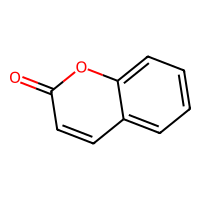

In [85]:
#Añadir columna tipo Mol al dataframe con frecuencias de scaffolds
PandasTools.AddMoleculeColumnToFrame(df_sca_all, smilesCol='Murcko_SMILES')
df_sca_all[0:1]

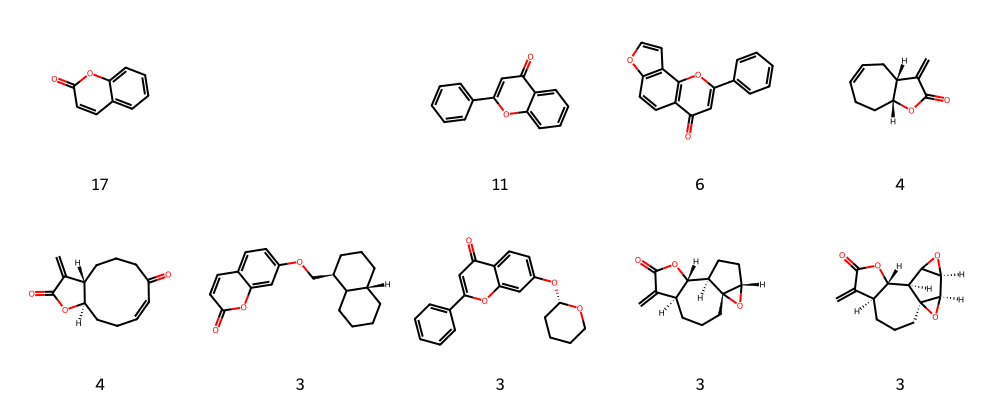

In [86]:
#Visualizar scaffolds con su conteo
PandasTools.FrameToGridImage(df_sca_all[0:10], column='ROMol', legendsCol='Amount', molsPerRow=5)

## Quantitative Estimate of Drug-Likeness
El QED es una medida para estimar las cualidades tipo fármaco de un compuesto. Está basado en ocho propiedades con relevancia farmacéutica: masa molar, coeficiente de partición, aceptores y donadores de puente de hidrógeno, área polar superficial, enlaces rotables, anillos aromáticos, y el número de alertas por grupos funcionales. El punto de corte que suele usarse es QED > 0.67.
Referencia: https://doi.org/10.1038/nchem.1243


In [88]:
#Añadimos la columna tipo Mol a la base de datos completa
PandasTools.AddMoleculeColumnToFrame(df_b,'canonical_smiles','Molecule',includeFingerprints=True)
print([str(x) for x in  df_b.columns])

['canonical_smiles', 'Murcko_SMILES', 'np_classifier_class', 'MW', 'HBD', 'HBA', 'TPSA', 'RotBonds', 'logP', 'CSP3', 'HetAtoms', 'NumRings', 'Molecule']


canonical_smiles  \
0  C=C(CO)C(=O)O[C@H]1CC(=C)[C@@H]2C[C@H](O)C(=C)...   
1  COC1=CC=C(C2=CC(=O)C3=C(OC)C(OC)=C(OC)C=C3O2)C=C1   
2  COC1=C(C(=O)CCC2=CC=CC=C2)C(O)=C(O)C2=C1C(=CC1...   
3                COC1=CC2=CC(C)=CC=C2C2=C1C=CC(=O)O2   
4               COC1=CC(OC)=C2C=CC(=O)OC2=C1CC=C(C)C   

                                       Murcko_SMILES  \
0  C=C1CC[C@H]2C(=C)CC[C@H]3C(=C)C(=O)O[C@@H]3[C@...   
1                        O=c1cc(-c2ccccc2)oc2ccccc12   
2         O=C1Oc2ccc(C(=O)CCc3ccccc3)cc2C1=Cc1ccccc1   
3                             O=c1ccc2ccc3ccccc3c2o1   
4                                   O=c1ccc2ccccc2o1   

        np_classifier_class          MW  HBD  HBA   TPSA  RotBonds     logP  \
0  Guaiane sesquiterpenoids  346.141638    2    6  93.06         3  1.05760   
1                  Flavones  342.110338    0    6  67.13         5  3.49440   
2                 Chalcones  416.125988    2    6  93.06         6  4.38150   
3          Simple coumarins  240.078644    0    3  39.44         1  3.26322   
4          Simple coumarins  274.120509    0    4  48.67         4  3.31890   

       CSP3  HetAtoms  NumRings  \
0  0.473684         6         3   
1  0.210526         6         3   
2  0.120000         6         4   
3  0.133333         3         3   
4  0.312500         4         2   

                                            Molecule  
0  <rdkit.Chem.rdchem.Mol object at 0x0000020D263...  
1  <rdkit.Chem.rdchem.Mol object at 0x0000020D263...  
2  <rdkit.Chem.rdchem.Mol object at 0x0000020D263...  
3  <rdkit.Chem.rdchem.Mol object at 0x0000020D263...  
4  <rdkit.Chem.rdchem.Mol object at 0x0000020D263...
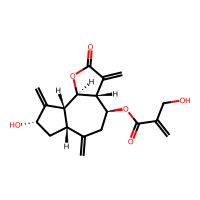
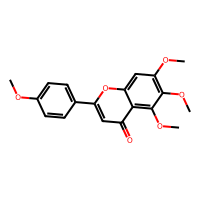
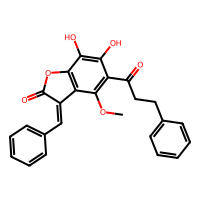
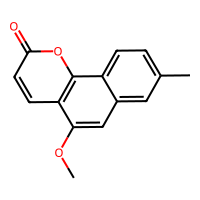
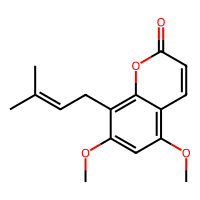

In [89]:
df_b.head()

canonical_smiles  \
0  C=C(CO)C(=O)O[C@H]1CC(=C)[C@@H]2C[C@H](O)C(=C)...   
1  COC1=CC=C(C2=CC(=O)C3=C(OC)C(OC)=C(OC)C=C3O2)C=C1   
2  COC1=C(C(=O)CCC2=CC=CC=C2)C(O)=C(O)C2=C1C(=CC1...   

                                       Murcko_SMILES  \
0  C=C1CC[C@H]2C(=C)CC[C@H]3C(=C)C(=O)O[C@@H]3[C@...   
1                        O=c1cc(-c2ccccc2)oc2ccccc12   
2         O=C1Oc2ccc(C(=O)CCc3ccccc3)cc2C1=Cc1ccccc1   

        np_classifier_class          MW  HBD  HBA   TPSA  RotBonds    logP  \
0  Guaiane sesquiterpenoids  346.141638    2    6  93.06         3  1.0576   
1                  Flavones  342.110338    0    6  67.13         5  3.4944   
2                 Chalcones  416.125988    2    6  93.06         6  4.3815   

       CSP3  HetAtoms  NumRings  \
0  0.473684         6         3   
1  0.210526         6         3   
2  0.120000         6         4   

                                            Molecule       QED  
0  <rdkit.Chem.rdchem.Mol object at 0x0000020D263...  0.450871  
1  <rdkit.Chem.rdchem.Mol object at 0x0000020D263...  0.706934  
2  <rdkit.Chem.rdchem.Mol object at 0x0000020D263...  0.203656
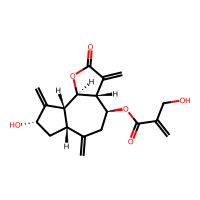
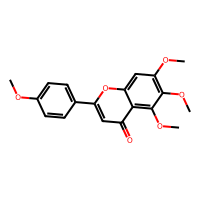
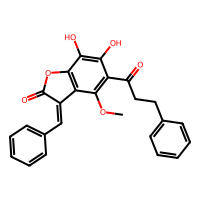

In [90]:
#Calculamos el QED
QEDlist = []

for mol in df_b['Molecule']:
    if mol is not None and isinstance(mol, Chem.Mol):
        qed_value = Chem.QED.qed(mol)
    else:
        qed_value = None
    QEDlist.append(qed_value)


df_b['QED']=QEDlist
df_b.head(3)

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_15276\1073911681.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="np_classifier_class", y="QED", data=df_b, palette="Set2")


Text(0.5, 1.0, 'Quantitative Estimate of Drug-Likeness')

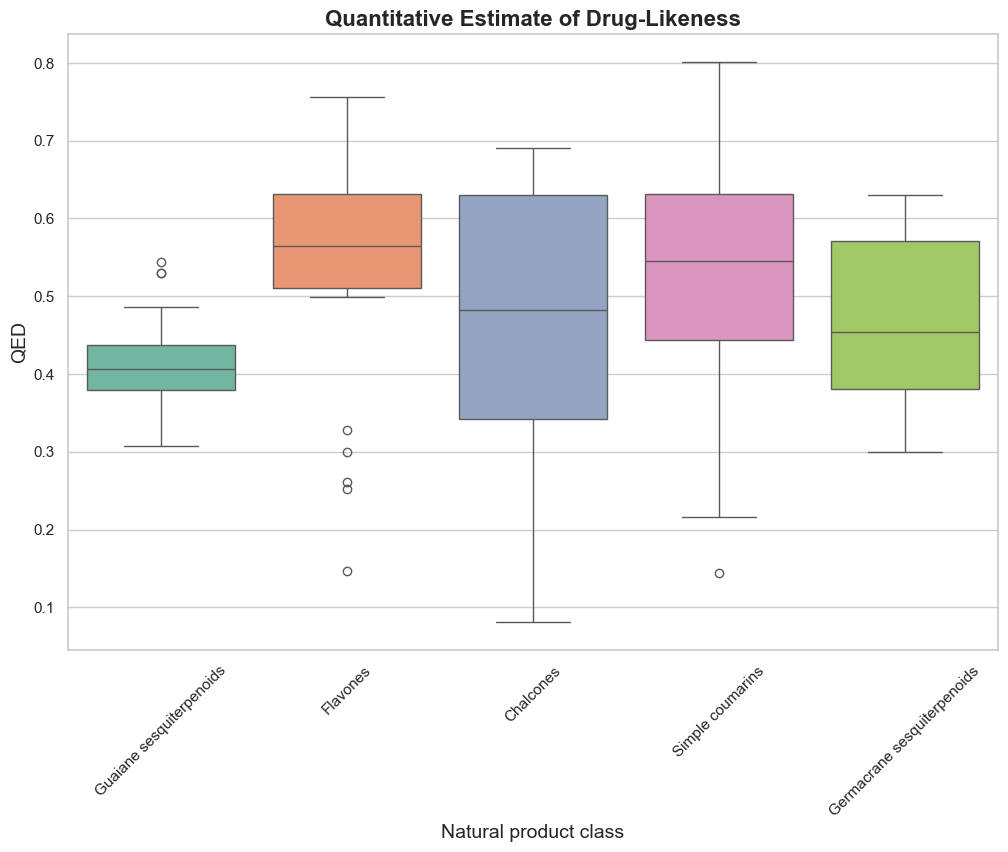

In [105]:
#Tamaño de figura
plt.figure(figsize=(12,8))
#Graficar boxplot
sns.boxplot(x="np_classifier_class", y="QED", data=df_b, palette="Set2")
#Título de ejes
plt.xlabel('Natural product class', size=14)
plt.ylabel('QED', size=14)
plt.xticks(rotation=45, ha='center')
plt.title('Quantitative Estimate of Drug-Likeness', fontweight='bold', fontsize=16)
